# Maternal Mortality Trends 2000-2023

## Introduction

`Maternal mortality` remains one of the most sensitive indicators of health system `performance`, `equity`, and `social development`. Despite decades of global investment and well-established clinical interventions, preventable maternal deaths continue to occur at unacceptably high levels in many parts of the world.

This notebook examines global, regional, and country-level trends in the `Maternal Mortality Ratio` (MMR) from 2000 to 2023, using the most recent `WHO` estimates released in April 2025. Rather than relying on single-year comparisons, the analysis focuses on long-term trajectories to understand where progress has been sustained, where it has stalled, and which populations remain most exposed to risk as the `2030 Sustainable Development Goal` deadline approaches.

The analysis proceeds in four stages. 

`First`, it documents global and regional trends over time, highlighting periods of accelerated progress and stagnation. 

`Second`, it explores country-level dynamics, distinguishing between relative improvement and absolute burden to avoid misleading comparisons. 

`Third`, it assesses progress through a progress–burden framework that situates countries within broader structural contexts. 

`Finally`, it projects maternal mortality outcomes to 2030 under a continuation of historical trends, identifying which regions and countries are currently on track to meet the SDG target and which are not.

Taken together, this work aims to move beyond headline averages and rankings, and instead provide a nuanced, data-driven perspective on maternal mortality, one that can inform policy prioritisation, accountability, and renewed commitment to reducing preventable maternal deaths worldwide.


## Scope & Data Source
**WHO data** (April 2025)

- Years covered (2000-2023)

- Units (MMR per 100,000 live births)

## Methodological Notes

### Aggregation choices
`Maternal Mortality Ratio` (MMR) is analysed primarily at the country level and then aggregated to regional and global levels using simple averages. This approach treats each country equally, regardless of population size, and is intended to highlight differences in health system performance and policy outcomes rather than total counts of maternal deaths. As a result, regional and global averages should be interpreted as indicative trends rather than population-weighted risk estimates.

### Regional groupings
`Regional analysis` uses the `World Health Organization` (WHO) regional classification (URR), which differs from more commonly used geographic or World Bank groupings. Notably, North America includes only the United States and Canada. At the same time, regions such as Europe and Central Asia and Eastern Europe and Central Asia are defined according to WHO administrative boundaries. These classifications are used consistently throughout the analysis to ensure comparability with official WHO reporting, but they may yield patterns that differ from analyses based on alternative regional frameworks.

## Imports and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("data/Maternal mortality trends.csv")
df.head()

,ISO Code,Country,UNICEF Programme Region,UNICEF Reporting Region,UNICEF Sub-Reporting Region,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,AFG,Afghanistan,South Asia,South Asia,South Asia,1372,1311,1263,1201,1166,...,755,741,702,659,629,601,634,660,551,521
1,ALB,Albania,Europe and Central Asia,Europe and Central Asia,Eastern Europe and Central Asia,15,14,14,13,13,...,10,9,8,8,7,7,7,14,8,7
2,DZA,Algeria,Middle East and North Africa,Middle East and North Africa,Middle East and North Africa,123,113,102,101,91,...,80,79,79,77,75,73,97,79,64,62
3,AND,Andorra,Industrialized,Europe and Central Asia,Western Europe,14,14,14,13,12,...,10,10,10,11,11,11,48,18,17,11
4,AGO,Angola,Eastern and Southern Africa,Sub-Saharan Africa,Eastern and Southern Africa,659,629,602,538,499,...,262,249,236,220,208,202,195,211,185,183


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ISO Code                     195 non-null    object
 1   Country                      195 non-null    object
 2   UNICEF Programme Region      195 non-null    object
 3   UNICEF Reporting Region      195 non-null    object
 4   UNICEF Sub-Reporting Region  195 non-null    object
 5   2000                         195 non-null    int64 
 6   2001                         195 non-null    int64 
 7   2002                         195 non-null    int64 
 8   2003                         195 non-null    int64 
 9   2004                         195 non-null    int64 
 10  2005                         195 non-null    int64 
 11  2006                         195 non-null    int64 
 12  2007                         195 non-null    int64 
 13  2008                         195 no

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,235.507692,226.123077,217.666667,208.676923,201.984615,197.620513,194.287179,193.046154,192.805128,191.230769,...,161.384615,155.738462,149.451282,144.800000,135.989744,134.620513,135.338462,151.758974,125.046154,116.630769
std,332.209634,319.847556,310.018268,295.181725,284.943827,277.334012,270.765333,269.212316,271.408360,273.915110,...,236.909006,234.258775,231.132580,228.895614,198.882989,211.694707,195.060388,192.309293,172.094834,165.044846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.500000,18.500000,17.500000,15.500000,15.500000,15.000000,14.000000,13.000000,13.000000,12.500000,...,13.000000,13.000000,12.500000,12.000000,12.000000,12.000000,17.500000,20.000000,14.500000,11.000000
50%,71.000000,68.000000,66.000000,67.000000,63.000000,60.000000,58.000000,57.000000,56.000000,56.000000,...,53.000000,52.000000,51.000000,47.000000,49.000000,48.000000,56.000000,77.000000,53.000000,47.000000
75%,368.500000,355.000000,330.500000,331.500000,313.500000,312.000000,292.000000,290.000000,281.000000,267.500000,...,212.000000,203.000000,192.000000,181.500000,172.000000,169.000000,178.000000,204.000000,159.500000,155.000000
max,1658.000000,1580.000000,1521.000000,1487.000000,1450.000000,1389.000000,1337.000000,1271.000000,1264.000000,1387.000000,...,1216.000000,1436.000000,1629.000000,1662.000000,1118.000000,1650.000000,1296.000000,1127.000000,1016.000000,993.000000


In [4]:
df.shape

(195, 29)

In [5]:
df.columns

Index(['ISO Code', 'Country', 'UNICEF Programme Region',
       'UNICEF Reporting Region', 'UNICEF Sub-Reporting Region', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [6]:
df = df.rename(columns ={
    "UNICEF Programme Region": "UPR",
    "UNICEF Reporting Region": "URR",
    "UNICEF Sub-Reporting Region": "USRR"
})

In [7]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia'

## Data Preparation

In [8]:
# Remove trailing spaces fro the countries
df['Country']= df['Country'].str.strip()

In [9]:
# Standardise the country column 
df['Country'] = df['Country'].replace({
    "Bolivia (Plurinational State of)": "Bolivia",
    "Côte d'Ivoire": "Cote d'Ivoire",
    "Democratic People's Republic of Korea": "North Korea",
    "Democratic Republic of the Congo": "DR Congo",
    "Iran (Islamic Republic of)": "Iran",
    "Lao People's Democratic Republic": "Laos",
    "Russian Federation": "Russia",
    "Micronesia (Federated States of)": "Micronesia",
    "Netherlands (Kingdom of the)": "Netherlands",
    "Republic of Korea": "South Korea",
    "State of Palestine": "Palestine",
    "Syrian Arab Republic": "Syria",
    "United Republic of Tanzania": "Tanzania",
    "The Republic of Türkiye": "Turkey",
    "Venezuela (Bolivarian Republic of)": "Venezuela",
    "Viet Nam": "Vietnam"
})

In [10]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'North Korea', 'DR Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau',

In [11]:
df['UPR'].unique()

array(['South Asia', 'Europe and Central Asia',
       'Middle East and North Africa', 'Industrialized',
       'Eastern and Southern Africa', 'Latin America and the Caribbean',
       'West and Central Africa', 'East Asia and the Pacific',
       'Not Classified'], dtype=object)

In [12]:
df['URR'].unique()

array(['South Asia', 'Europe and Central Asia',
       'Middle East and North Africa', 'Sub-Saharan Africa',
       'Latin America and Caribbean', 'East Asia and Pacific',
       'North America', 'Not Classified'], dtype=object)

In [13]:
df['URR'].value_counts()

URR
Europe and Central Asia         52
Sub-Saharan Africa              49
Latin America and Caribbean     33
East Asia and Pacific           31
Middle East and North Africa    19
South Asia                       8
North America                    2
Not Classified                   1
Name: count, dtype: int64

In [14]:
df['UPR'].value_counts()

UPR
Industrialized                     37
Latin America and the Caribbean    33
East Asia and the Pacific          28
West and Central Africa            24
Eastern and Southern Africa        23
Europe and Central Asia            21
Middle East and North Africa       20
South Asia                          8
Not Classified                      1
Name: count, dtype: int64

In [15]:
# reshape a df_long from a "wide" format to a "long" format
df_long = df.melt(
    id_vars = ['ISO Code', 'Country', 'UPR', 'URR', 'USRR'],
    var_name = 'Year',
    value_name = 'MMR'
)

df_long['Year'] = df_long['Year'].astype(int)
df_long

,ISO Code,Country,UPR,URR,USRR,Year,MMR
0,AFG,Afghanistan,South Asia,South Asia,South Asia,2000,1372
1,ALB,Albania,Europe and Central Asia,Europe and Central Asia,Eastern Europe and Central Asia,2000,15
2,DZA,Algeria,Middle East and North Africa,Middle East and North Africa,Middle East and North Africa,2000,123
3,AND,Andorra,Industrialized,Europe and Central Asia,Western Europe,2000,14
4,AGO,Angola,Eastern and Southern Africa,Sub-Saharan Africa,Eastern and Southern Africa,2000,659
...,...,...,...,...,...,...,...
4675,VEN,Venezuela,Latin America and the Caribbean,Latin America and Caribbean,Latin America and Caribbean,2023,227
4676,VNM,Vietnam,East Asia and the Pacific,East Asia and Pacific,East Asia and Pacific,2023,48
4677,YEM,Yemen,Middle East and North Africa,Middle East and North Africa,Middle East and North Africa,2023,118
4678,ZMB,Zambia,Eastern and Southern Africa,Sub-Saharan Africa,Eastern and Southern Africa,2023,85


*To prepare the dataset for analysis, I transformed it from wide to long (tidy) format and converted the Year variable to a numeric data type. This restructuring was essential for several reasons:* 

`First`, converting to a long format consolidates all yearly observations into two columns, `'Year'` and `'MMR'`, which is the standard requirement for most visualisation libraries (like Matplotlib and Seaborn) to plot time-series data and trend lines. It also simplifies advanced operations, such as grouping data by year to calculate the global average or filtering for specific periods, such as the SDG transition post-2015. 

`Second`, making the `'Year`' column numeric (integer) ensures the computer treats time as a continuous scale rather than a list of text labels. This allows for proper chronological ordering on the X-axis and enables the mathematical modelling required to project our 2030 forecasts, as a predictive algorithm requires numeric inputs to calculate the trajectory toward the global target.

Prior to reshaping the data, I performed essential cleaning to ensure statistical integrity. This included handling missing values (there were none) and verifying that ISO Codes and Country names were standardised for accurate regional grouping. 

## Data Analysis

## Global Trend

In [16]:
global_trend = (
    df_long
    .groupby("Year")["MMR"]
    .mean()
    .reset_index()
)

In [17]:
global_trend

,Year,MMR
0,2000,235.507692
1,2001,226.123077
2,2002,217.666667
3,2003,208.676923
4,2004,201.984615
5,2005,197.620513
6,2006,194.287179
7,2007,193.046154
8,2008,192.805128
9,2009,191.230769


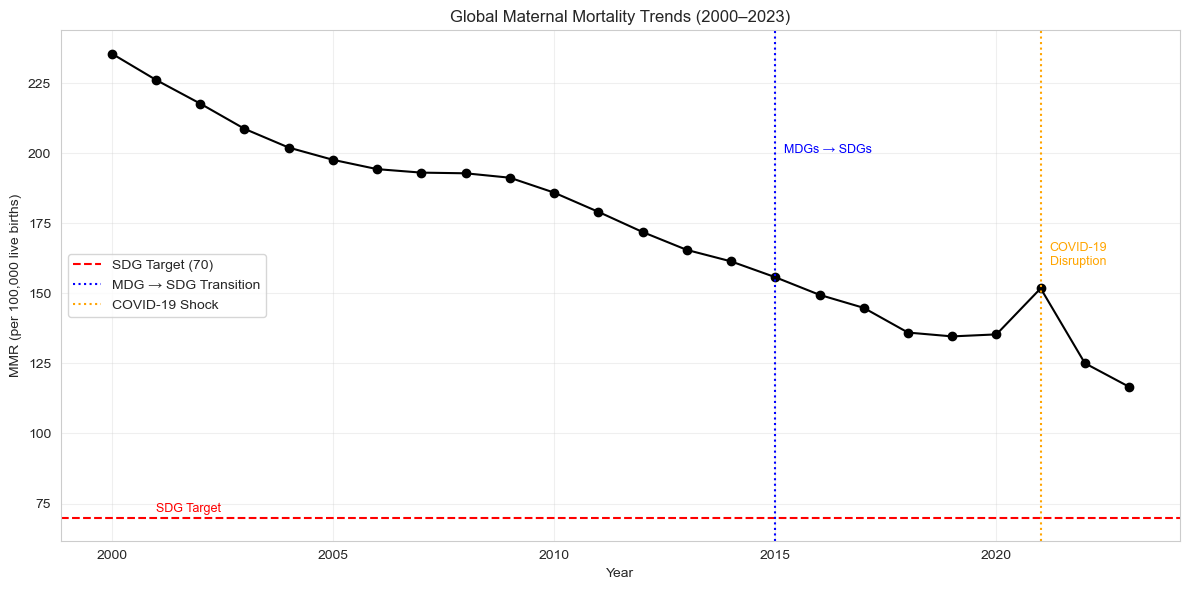

In [18]:
plt.figure(figsize=(12,6))

plt.plot(global_trend["Year"], global_trend["MMR"], marker="o", color="black")

# Key reference lines
plt.axhline(70, color="red", linestyle="--", label="SDG Target (70)")
plt.axvline(2015, color="blue", linestyle=":", label="MDG → SDG Transition")
plt.axvline(2021, color="orange", linestyle=":", label="COVID-19 Shock")

# Annotations
plt.text(2015.2, 200, "MDGs → SDGs", color="blue", fontsize=9)
plt.text(2021.2, 160, "COVID-19\nDisruption", color="orange", fontsize=9)
plt.text(2001, 72, "SDG Target", color="red", fontsize=9)

plt.title("Global Maternal Mortality Trends (2000–2023)")
plt.xlabel("Year")
plt.ylabel("MMR (per 100,000 live births)")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Here, the trajectory of maternal mortality is shown through **distinct phases**. From 2000 to 2015, the world saw a **Steep Descent**, with the ratio dropping rapidly, representing a decade and more of highly effective early progress (SDG era). 

However, this momentum began to fade into **a Plateau** (2016-2020) even before the onset of the pandemic; this flattening suggests that the **"easy wins"** in maternal healthcare, such as basic improvements in hygiene and initial access to skilled birth attendance, had been exhausted, leaving more complex systemic issues unaddressed. 

The **Fragility Shock** of 2021 then served as a stark reminder of how quickly these gains can be erased, as a single global health crisis caused a sharp spike in mortality, proving that a downward trend is not an automatic byproduct of time but the result of constant, **fragile effort**. 

Looking ahead, the Distance to 2030 remains a critical concern; as of 2023, the global average is significantly above the UN’s Sustainable Development Goal (SDG) target of **70 deaths per 100,000 live births**. 

In [19]:
#Average maternal mortality ratio by region using URR
regional_avg = df_long.groupby('URR')['MMR'].mean().sort_values(ascending = False)
regional_avg

URR
Sub-Saharan Africa              479.941327
South Asia                      260.817708
East Asia and Pacific           122.973118
Latin America and Caribbean      86.316919
Middle East and North Africa     45.655702
Not Classified                   20.000000
North America                    13.958333
Europe and Central Asia          13.806891
Name: MMR, dtype: float64

In [20]:
#Average maternal mortality ratio by region and year
regional_trends = df_long.groupby(['URR', 'Year'])['MMR'].mean().reset_index()
regional_trends

,URR,Year,MMR
0,East Asia and Pacific,2000,173.193548
1,East Asia and Pacific,2001,167.451613
2,East Asia and Pacific,2002,163.225806
3,East Asia and Pacific,2003,156.096774
4,East Asia and Pacific,2004,152.838710
...,...,...,...
187,Sub-Saharan Africa,2019,375.571429
188,Sub-Saharan Africa,2020,359.326531
189,Sub-Saharan Africa,2021,378.959184
190,Sub-Saharan Africa,2022,328.959184


In [21]:
#Average MMR by URR in 2000 and 2023
urr_pivot = (
    df_long[df_long["Year"].isin([2000, 2023])]
    .pivot_table(
        values="MMR",
        index="URR",
        columns="Year",
        aggfunc="mean"
    )
    .sort_values(by=2000, ascending=False)
)
urr_pivot

Year,2000,2023
URR,,
Sub-Saharan Africa,633.448980,316.959184
South Asia,451.625000,138.750000
East Asia and Pacific,173.193548,85.354839
Latin America and Caribbean,107.545455,71.666667
Middle East and North Africa,67.473684,30.526316
Not Classified,22.000000,11.000000
Europe and Central Asia,19.788462,9.057692
North America,10.500000,14.500000


In [22]:
#Pivot for comparison
pivot_trends = regional_trends.pivot(index='URR', columns='Year', values='MMR')

#Percent change formula
percent_change = ((pivot_trends[2023] - pivot_trends[2000]) / pivot_trends[2000]) * 100
percent_change.sort_values()

URR
South Asia                     -69.277609
Middle East and North Africa   -54.758190
Europe and Central Asia        -54.227405
East Asia and Pacific          -50.717080
Not Classified                 -50.000000
Sub-Saharan Africa             -49.962950
Latin America and Caribbean    -33.361510
North America                   38.095238
dtype: float64

To understand the geographical distribution of maternal deaths, I grouped the data by `UN Regions` (URR). This allows us to compare the average `Maternal Mortality Ratio` (MMR) at the start of the millennium (2000) against the most recent data (2023). 

*I also calculated the Percentage Change for each region to identify where the most significant progress has been made.*

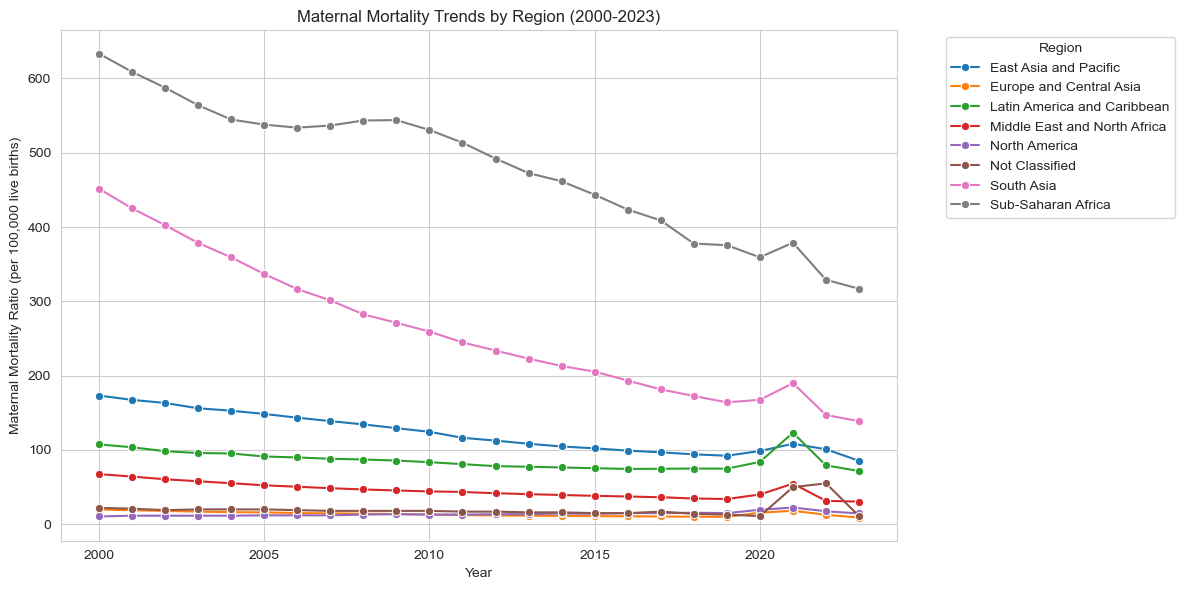

In [23]:
plt.figure(figsize=(12,6))

sns.lineplot(
    data = regional_trends,
    x= 'Year',
    y= 'MMR',
    hue= 'URR',
    marker= 'o'
)

plt.title("Maternal Mortality Trends by Region (2000-2023)")
plt.ylabel("Maternal Mortality Ratio (per 100,000 live births)")
plt.xlabel("Year")
plt.legend(title= "Region", bbox_to_anchor= (1.05,1), loc = 'upper left')
plt.tight_layout()
plt.show()

*The above figure shows maternal mortality trends by WHO region (URR) from 2000 to 2023.*

All regions experienced declines over the period, but the pace and magnitude of improvement varied substantially. `South Asia` and `Sub-Saharan Africa` started with the highest maternal mortality ratios and achieved large reductions over time, while regions with already low mortality, such as `Europe`, `Central Asia` and `North America`, showed much smaller absolute changes.

In [24]:
#find best and worst regions
slowest_region = percent_change.idxmax()
best_region = percent_change.idxmin()

print(f"Region with slowest improvement: {slowest_region}")
print(f"Region with best improvement: {best_region}")

Region with slowest improvement: North America
Region with best improvement: South Asia


In [25]:
#Build palette with highlights
all_regions = regional_trends['URR'].unique()
palette = {region: "grey" for region in all_regions}

palette[slowest_region] = "red"
palette[best_region] = "green"

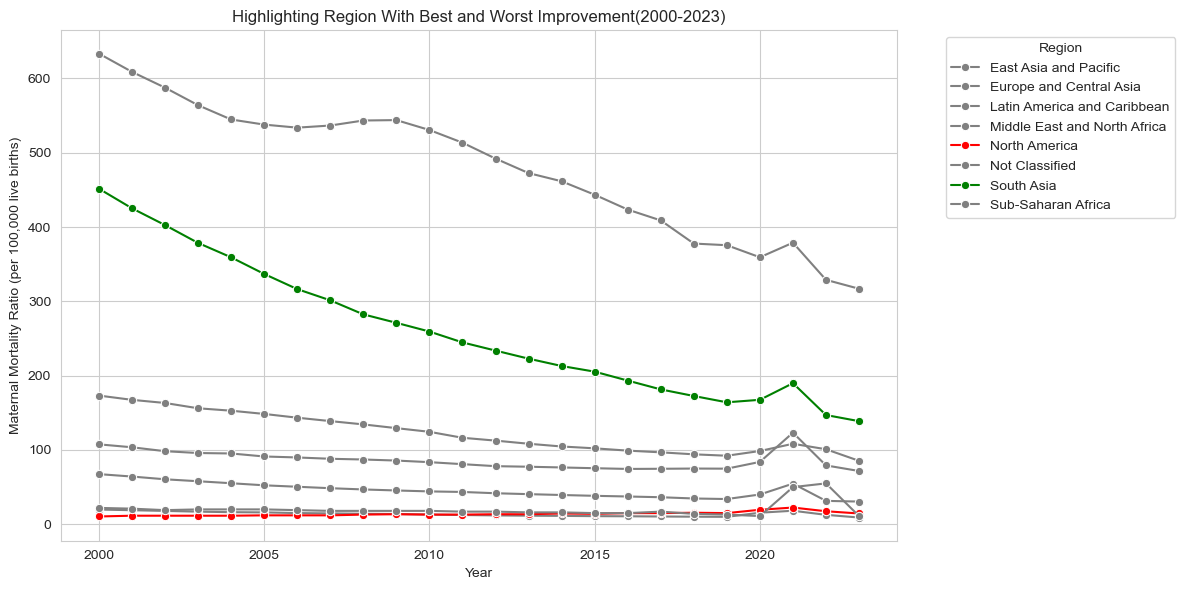

In [26]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=regional_trends,
    x='Year',
    y='MMR',
    hue='URR',
    palette=palette,
    marker='o'
)

plt.title("Highlighting Region With Best and Worst Improvement(2000-2023)")
plt.ylabel("Maternal Mortality Ratio (per 100,000 live births)")
plt.xlabel("Year")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

While all regions show overall declines, the chart illustrates how progress varies by baseline burden. High-burden regions such as `South Asia` achieved significant absolute and relative reductions, producing steep downward slopes. Low-burden regions, including `North America`, exhibit flatter trajectories, in which even small absolute increases or decreases translate into significant percentage changes.

- Note: Here, `North America` refers to the `USA` and `Canada`.

In [27]:
pivot_trends = regional_trends.pivot(index='URR', columns='Year', values='MMR')

# Build summary
progress_summary = pd.DataFrame({
    "MMR_2000": pivot_trends[2000],
    "MMR_2023": pivot_trends[2023],
})

progress_summary["PercentChange"] = ((progress_summary["MMR_2023"] - progress_summary["MMR_2000"]) 
                                     / progress_summary["MMR_2000"]) * 100

progress_summary = progress_summary.sort_values("MMR_2023", ascending=False)
progress_summary

,MMR_2000,MMR_2023,PercentChange
URR,,,
Sub-Saharan Africa,633.448980,316.959184,-49.962950
South Asia,451.625000,138.750000,-69.277609
East Asia and Pacific,173.193548,85.354839,-50.717080
Latin America and Caribbean,107.545455,71.666667,-33.361510
Middle East and North Africa,67.473684,30.526316,-54.758190
North America,10.500000,14.500000,38.095238
Not Classified,22.000000,11.000000,-50.000000
Europe and Central Asia,19.788462,9.057692,-54.227405


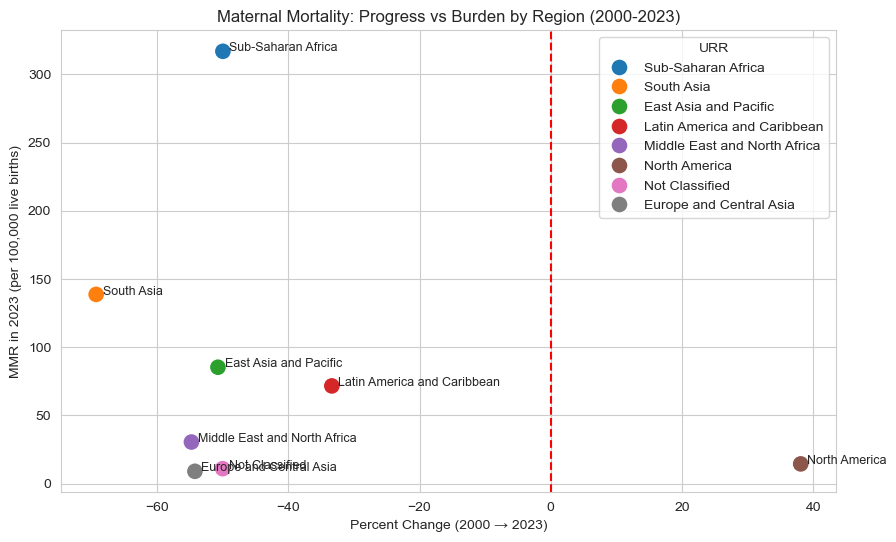

In [28]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=progress_summary,
    x="PercentChange",
    y="MMR_2023",
    hue=progress_summary.index,   
    s=150                         
)

#Labels for each point
for region, row in progress_summary.iterrows():
    plt.text(row["PercentChange"]+1, row["MMR_2023"], region, fontsize=9)

plt.axvline(0, color="red", linestyle="--")   # Vertical line at 0% (no change)
plt.title("Maternal Mortality: Progress vs Burden by Region (2000-2023)")
plt.xlabel("Percent Change (2000 → 2023)")
plt.ylabel("MMR in 2023 (per 100,000 live births)")
plt.show()

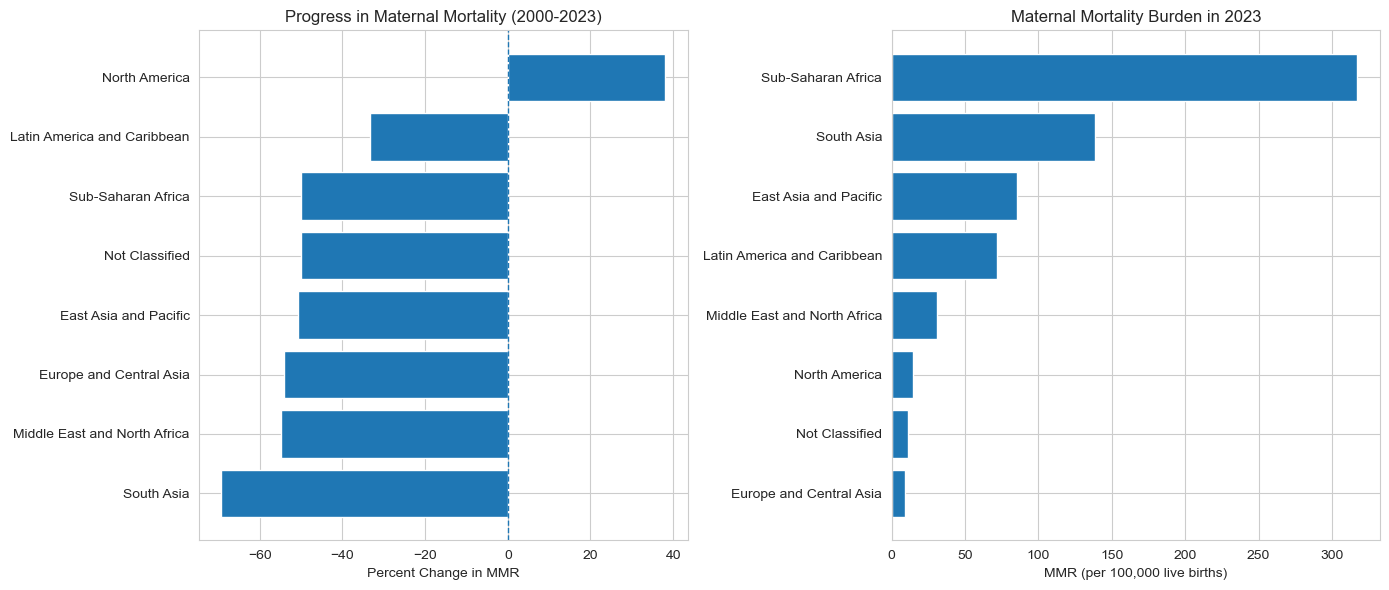

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

#Sort 
sorted_regions = progress_summary.sort_values("PercentChange")

#Panel A: Progress 
axes[0].barh(
    sorted_regions.index,
    sorted_regions["PercentChange"]
)
axes[0].axvline(0, linestyle="--", linewidth=1)
axes[0].set_title("Progress in Maternal Mortality (2000-2023)")
axes[0].set_xlabel("Percent Change in MMR")

#Panel B: Burden
sorted_burden = progress_summary.sort_values("MMR_2023")

axes[1].barh(
    sorted_burden.index,
    sorted_burden["MMR_2023"]
)
axes[1].set_title("Maternal Mortality Burden in 2023")
axes[1].set_xlabel("MMR (per 100,000 live births)")

plt.tight_layout()
plt.show()

#### Measuring Progress: The Rate of Change (2000-2023).
Visualising the percent change in **maternal mortality ratios** (MMR) between 2000 and 2023. This approach highlights relative progress between 2000 and 2023 and absolute burden in `2023`. `South Asia` leads globally, cutting its MMR by nearly **70%**, reflecting sustained gains in maternal health coverage and access to care. By contrast, North America is a clear outlier. While every other region recorded net improvement, it experienced a **38.1%** increase over the same period, indicating a concerning reversal that merits deeper policy attention. Meanwhile, `Sub-Saharan Africa`, `East Asia` and the Pacific, and `Europe` and `Central Asia` each achieved reductions of more than **50%**, reinforcing that meaningful progress is achievable across diverse health system contexts.

**Still, Sub-Saharan Africa bears the brunt, and North America has a low burden.**

In [30]:
#Inequality-over-time analysis
#For each year, get max MMR (worst region) and min MMR (best region)
gap_trend = regional_trends.groupby("Year")["MMR"].agg(["max", "min"])

#calculate the gap
gap_trend["Gap"] = gap_trend["max"] - gap_trend["min"]
gap_trend

,max,min,Gap
Year,,,
2000,633.448980,10.500000,622.948980
2001,608.877551,11.500000,597.377551
2002,587.612245,11.500000,576.112245
2003,563.979592,11.500000,552.479592
2004,544.775510,11.500000,533.275510
2005,537.897959,12.000000,525.897959
2006,533.795918,12.000000,521.795918
2007,536.653061,12.000000,524.653061
2008,543.408163,13.000000,530.408163


#### Tracking the Gap: Inequality Over Time (2000-2023).

While global `maternal mortality` has declined since `2000`, the gap between the highest- and lowest-burden settings remains substantial. The worst-performing regions and countries have made measurable progress, with the highest observed maternal mortality ratio falling by roughly half over the past two decades. 

However, countries with already low maternal mortality have maintained mainly their advantage, resulting in persistent inequality despite overall improvement. This narrowing from the top reflects progress among the most vulnerable, but the continued distance between best- and worst-performing settings underscores that global gains have not translated into equity. 

Maternal mortality outcomes continue to mirror **structural disparities in health system strength, access, and resilience**.

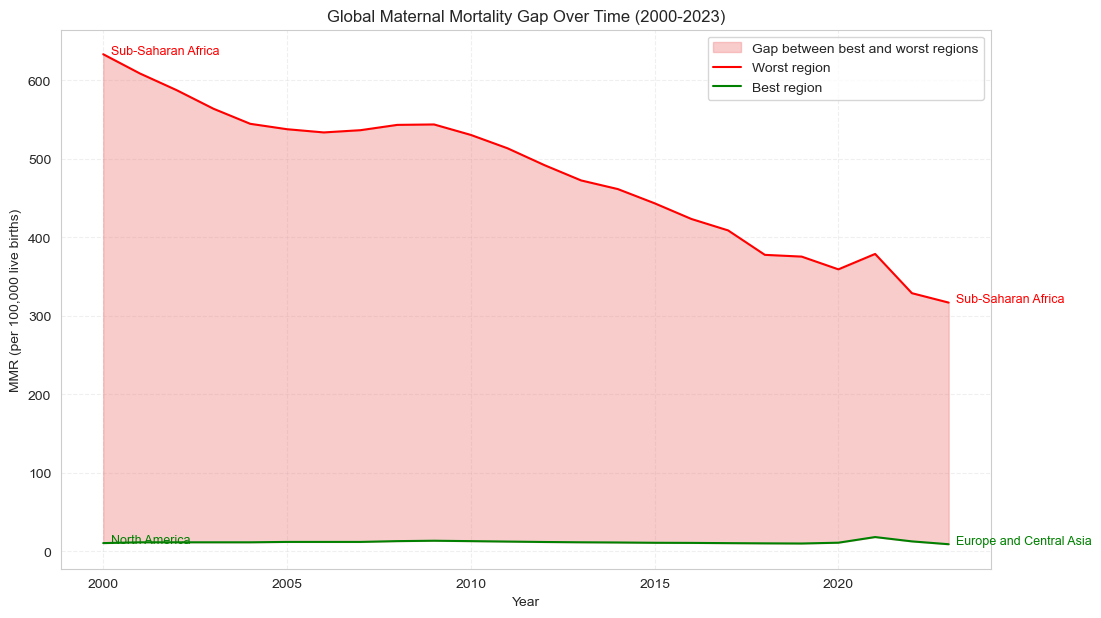

In [31]:
# 1️ Compute max, min, and gap per year
gap_trend = regional_trends.groupby("Year")["MMR"].agg(["max", "min"])
gap_trend["Gap"] = gap_trend["max"] - gap_trend["min"]

# 1a️ Find the corresponding regions for max and min
# For each year, get the region with highest and lowest MMR
worst_region = regional_trends.loc[regional_trends.groupby("Year")["MMR"].idxmax()][["Year","URR","MMR"]]
best_region  = regional_trends.loc[regional_trends.groupby("Year")["MMR"].idxmin()][["Year","URR","MMR"]]

# 2️ Plot the inequality area
plt.figure(figsize=(12,7))

plt.fill_between(
    gap_trend.index,        
    gap_trend['min'],       
    gap_trend['max'],       
    color='lightcoral',
    alpha=0.4,
    label='Gap between best and worst regions'
)

plt.plot(gap_trend.index, gap_trend['max'], color='red', label='Worst region')
plt.plot(gap_trend.index, gap_trend['min'], color='green', label='Best region')

# 3 Annotate the best and worst region names at start and end
for year in [2000, 2023]:
    w_row = worst_region[worst_region["Year"]==year]
    b_row = best_region[best_region["Year"]==year]
    plt.text(year+0.2, w_row["MMR"].values[0], w_row["URR"].values[0], color="red", fontsize=9)
    plt.text(year+0.2, b_row["MMR"].values[0], b_row["URR"].values[0], color="green", fontsize=9)

plt.title("Global Maternal Mortality Gap Over Time (2000-2023)")
plt.xlabel("Year")
plt.ylabel("MMR (per 100,000 live births)")
plt.legend()
plt.grid(alpha=0.3, linestyle='--')
plt.show()

The gap trend plot reveals a persistent regional hierarchy in maternal mortality outcomes over time. `Sub-Saharan Africa` consistently ranks **highest** throughout the period, both at the start and end, indicating that while improvements have occurred, the region remains the most burdened. 

In contrast, `North America` begins the period at the lower end of the distribution, while Europe and Central Asia are at the bottom by 2023. This shift at the bottom reflects modest improvements among already low-burden regions rather than convergence with high-burden settings. Overall, the plot highlights that relative positions have changed little over two decades, underscoring the enduring structural nature of global maternal health inequality.

In [32]:
#Average maternal mortality ratio by region using UPR
regional_avg1 = df_long.groupby('UPR')['MMR'].mean().sort_values(ascending = False)
regional_avg1

UPR
West and Central Africa            559.644097
Eastern and Southern Africa        409.827899
South Asia                         260.817708
East Asia and the Pacific          135.403274
Latin America and the Caribbean     86.316919
Middle East and North Africa        76.158333
Europe and Central Asia             21.315476
Not Classified                      20.000000
Industrialized                       8.730856
Name: MMR, dtype: float64

In [33]:
#Average MMR by UPR in 2000 and 2023
upr_pivot = (
    df_long[df_long["Year"].isin([2000, 2023])]
    .pivot_table(
        values="MMR",
        index="UPR",
        columns="Year",
        aggfunc="mean"
    )
    .sort_values(by=2000, ascending=False)
)
upr_pivot

Year,2000,2023
UPR,,
West and Central Africa,713.958333,385.541667
Eastern and Southern Africa,554.695652,254.782609
South Asia,451.625000,138.750000
East Asia and the Pacific,190.785714,94.071429
Middle East and North Africa,120.950000,49.800000
Latin America and the Caribbean,107.545455,71.666667
Europe and Central Asia,33.000000,12.714286
Not Classified,22.000000,11.000000
Industrialized,10.621622,6.675676


In [34]:
# Pivot table for all years by UPR
pivot_upr = df_long.pivot_table(index='UPR', columns='Year', values='MMR', aggfunc='mean')
# Percent change
upr_percent_change = ((pivot_upr[2023] - pivot_upr[2000]) / pivot_upr[2000]) * 100
upr_percent_change = upr_percent_change.sort_values()
upr_percent_change

UPR
South Asia                        -69.277609
Europe and Central Asia           -61.471861
Middle East and North Africa      -58.825961
Eastern and Southern Africa       -54.068036
East Asia and the Pacific         -50.692624
Not Classified                    -50.000000
West and Central Africa           -45.999416
Industrialized                    -37.150127
Latin America and the Caribbean   -33.361510
dtype: float64

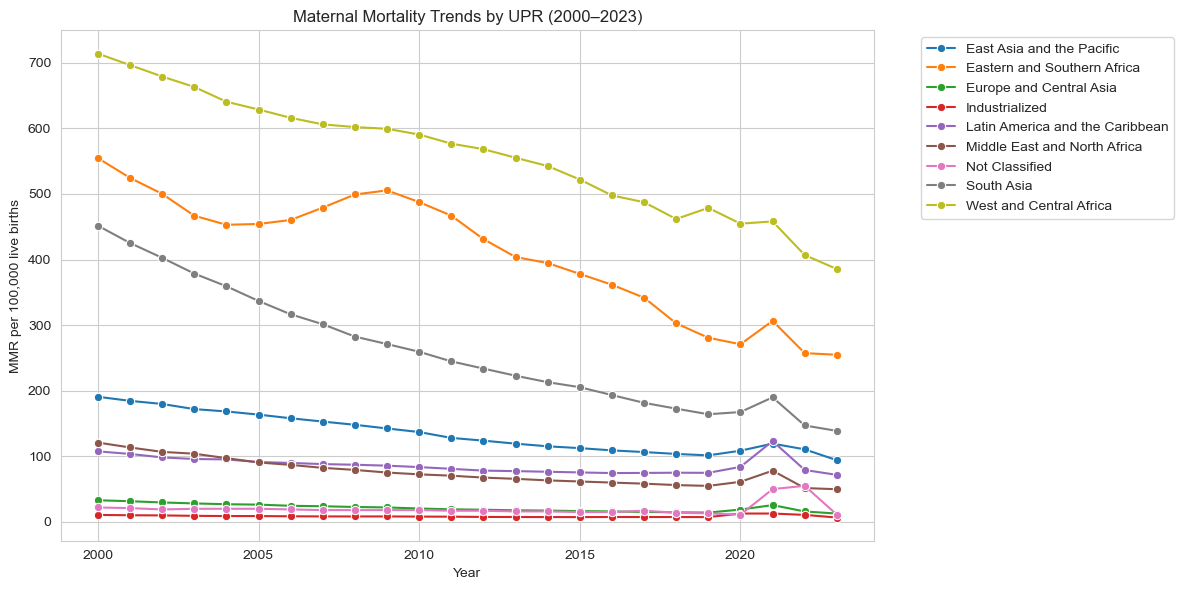

In [35]:
# Average MMR by UPR and year
upr_trends = df_long.groupby(['UPR','Year'])['MMR'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(
    data=upr_trends,
    x='Year',
    y='MMR',
    hue='UPR',
    marker='o'
)
plt.title("Maternal Mortality Trends by UPR (2000–2023)")
plt.ylabel("MMR per 100,000 live births")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

The `UPR line chart` shows a clear stratification in maternal mortality trends by development group, with less developed settings consistently experiencing `higher MMR levels` over the period. 

While all `UPR categories` exhibit long-term declines, the pace of improvement differs, highlighting persistent structural gaps despite overall global progress.

### Transition to Country-Level Analysis

Regional averages provide the "what," but country-level data provides the "where." To understand whether successes in `South Asia` are uniform or driven by a few high-performing nations, and to identify which specific countries are driving increases or decreases in other regions, we now pivot to a Country-Level Deep Dive.

In [36]:
#Country-level analysis
#Group by country and year

country_trends = df_long.groupby(['Country', 'Year'])['MMR'].mean().reset_index()
country_trends

,Country,Year,MMR
0,Afghanistan,2000,1372.0
1,Afghanistan,2001,1311.0
2,Afghanistan,2002,1263.0
3,Afghanistan,2003,1201.0
4,Afghanistan,2004,1166.0
...,...,...,...
4675,Zimbabwe,2019,388.0
4676,Zimbabwe,2020,380.0
4677,Zimbabwe,2021,446.0
4678,Zimbabwe,2022,368.0


In [37]:
# Pivot to show comparison
# Shows each country as a row and year as a column
pivot_country = country_trends.pivot(index = 'Country', columns = 'Year', values = 'MMR')

# Percent change 2000 - 2023
country_percent_change = ((pivot_country[2023] - pivot_country[2000])/ pivot_country[2000]) * 100
country_percent_change = country_percent_change.sort_values()
country_percent_change.head(10)

Country
Belarus        -95.000000
Bhutan         -85.493827
Mozambique     -84.380952
Kazakhstan     -82.758621
Russia         -82.352941
Laos           -81.609195
Estonia        -81.481481
Turkmenistan   -80.000000
Norway         -80.000000
Bangladesh     -78.011472
dtype: float64

In [38]:
country_percent_change.tail(10)

Country
Gabon                  30.898876
Canada                 33.333333
United States          41.666667
Bahamas                49.019608
Mauritius              53.488372
Jamaica                58.536585
Dominican Republic     63.157895
Portugal               66.666667
Venezuela             163.953488
Cook Islands                 NaN
dtype: float64

In [39]:
# Lowest 5 (best performers)
lowest_2023 = pivot_country[2023].nsmallest(5)
print("Lowest MMR countries in 2023:")
print(lowest_2023)

# Highest 5 (worst performers)
highest_2023 = pivot_country[2023].nlargest(5)
print("\nHighest MMR countries in 2023:")
print(highest_2023)

Lowest MMR countries in 2023:
Country
Cook Islands    0.0
Belarus         1.0
Norway          1.0
Australia       2.0
Israel          2.0
Name: 2023, dtype: float64

Highest MMR countries in 2023:
Country
Nigeria                     993.0
Chad                        748.0
Central African Republic    692.0
South Sudan                 692.0
Liberia                     628.0
Name: 2023, dtype: float64


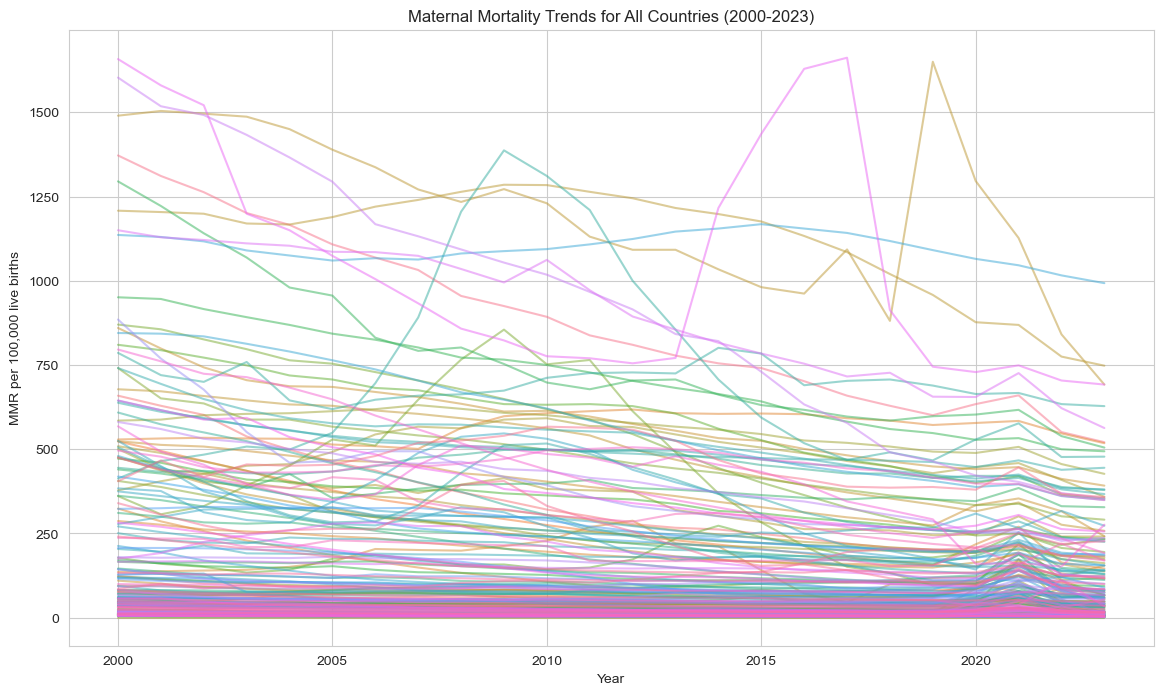

In [40]:
plt.figure(figsize=(14,8))
sns.lineplot(
    data=country_trends,
    x='Year',
    y='MMR',
    hue='Country',
    legend=False,  # hides messy legend (too many countries)
    alpha=0.5      # makes lines transparent
)
plt.title("Maternal Mortality Trends for All Countries (2000-2023)")
plt.ylabel("MMR per 100,000 live births")
plt.show()

**Note on Visualisation:** The chart above (*"Maternal Mortality Trends for All Countries"*) illustrates the extreme volatility in high-burden nations (the high-arcing lines) compared to the stability of lower-burden nations (the thick band at the bottom). While hard to read individually, it visualises the magnitude of disparity some countries are battling, with rates of 1,500+, while others are near 0.

In [41]:
pivot_country['Absolute Change'] = pivot_country[2023] - pivot_country[2000]
country_percent_change = ((pivot_country[2023] - pivot_country[2000])/ pivot_country[2000]) * 100

top_relative = country_percent_change.sort_values().head(10)
top_absolute = pivot_country['Absolute Change'].sort_values().head(10)

In [42]:
top_relative

Country
Belarus        -95.000000
Bhutan         -85.493827
Mozambique     -84.380952
Kazakhstan     -82.758621
Russia         -82.352941
Laos           -81.609195
Estonia        -81.481481
Turkmenistan   -80.000000
Norway         -80.000000
Bangladesh     -78.011472
dtype: float64

In [43]:
top_absolute

Country
Sierra Leone               -1249.0
South Sudan                 -966.0
Afghanistan                 -851.0
Central African Republic    -798.0
Guinea-Bissau               -790.0
Ethiopia                    -675.0
Rwanda                      -656.0
Timor-Leste                 -604.0
Somalia                     -587.0
Laos                        -497.0
Name: Absolute Change, dtype: float64

#### Country-Level Progress: `Relative` vs `Absolute Change` (2000-2023)
Two different stories emerge depending on how progress is measured.

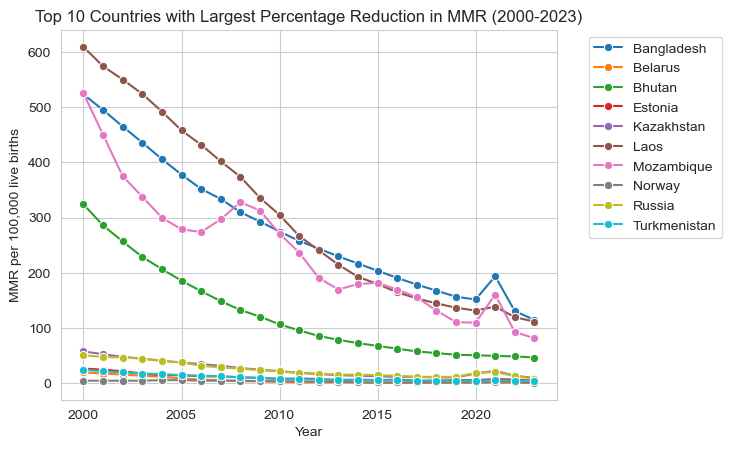

In [44]:
top10 = top_relative.index
sns.lineplot(
    data=country_trends[country_trends['Country'].isin(top10)],
    x='Year',
    y='MMR',
    hue='Country',
    marker='o'
)
plt.title("Top 10 Countries with Largest Percentage Reduction in MMR (2000-2023)")
plt.ylabel("MMR per 100,000 live births")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

#### Relative (Percentage) Reductions.
Countries such as `Belarus` (-95%), `Norway` (-80%), and `Estonia` (81%) rank among the top performers when progress is measured in percentage terms. 

However, these gains reflect reductions from already low maternal mortality baselines (e.g., `Belarus`, which declined from ~20 to ~1 deaths per 100,000 live births). While these improvements are meaningful and demonstrate strong health system performance, their absolute impact on global maternal deaths is limited due to the low initial burden.

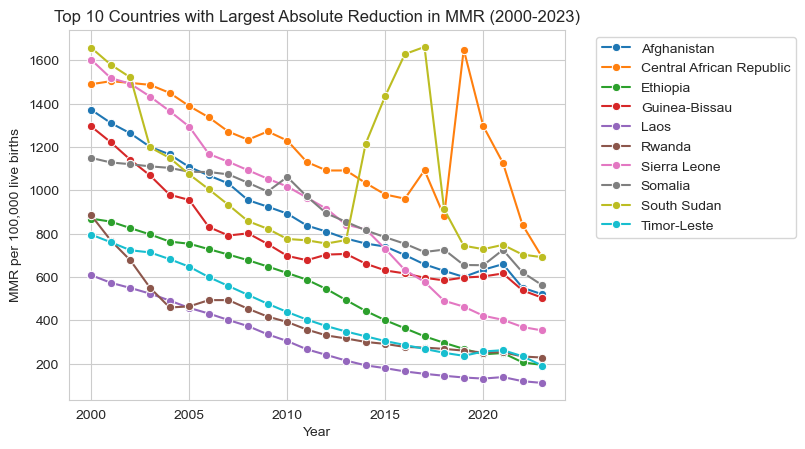

In [45]:
top10a = top_absolute.index
sns.lineplot(
    data=country_trends[country_trends['Country'].isin(top10a)],
    x='Year',
    y='MMR',
    hue='Country',
    marker='o'
)
plt.title("Top 10 Countries with Largest Absolute Reduction in MMR (2000-2023)")
plt.ylabel("MMR per 100,000 live births")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

#### Absolute Reductions.
In contrast, countries such as `Sierra Leone` (-1,249), `South Sudan` (-966), `Afghanistan` (-851), and `Ethiopia` (-675) dominate when progress is measured in absolute terms. 

These countries started with extremely high maternal mortality ratios, and even partial improvements translate into hundreds of lives saved per 100,000 live births. Absolute reductions, therefore, capture where the most significant human impact has occurred.

#### Key Insight.
Percentage change highlights efficiency and system effectiveness, while absolute change reflects scale and lives saved. High-income and low-burden countries tend to lead in relative progress, whereas high-burden countries account for the largest absolute reductions. 

Both metrics are necessary: relying on one alone risks overstating progress in low-burden settings or underrecognizing meaningful gains in high-mortality contexts.

In [46]:
# Bottom 10 countries by percent change
bottom10_percent = country_percent_change.sort_values(ascending=False).head(10)
bottom10_percent

Country
Venezuela             163.953488
Portugal               66.666667
Dominican Republic     63.157895
Jamaica                58.536585
Mauritius              53.488372
Bahamas                49.019608
United States          41.666667
Canada                 33.333333
Gabon                  30.898876
Greece                 25.000000
dtype: float64

In [47]:
# Bottom 10 countries by absolute change
bottom10_absolute = pivot_country['Absolute Change'].sort_values(ascending=False).head(10)
bottom10_absolute

Country
Venezuela             141.0
Lesotho                65.0
Gabon                  55.0
Dominican Republic     48.0
Jamaica                48.0
Bahamas                25.0
Mauritius              23.0
Botswana               19.0
Samoa                   8.0
Portugal                6.0
Name: Absolute Change, dtype: float64

#### Countries with Worsening Maternal Mortality (2000-2023)
Two distinct patterns emerge when examining countries with the poorest performance.

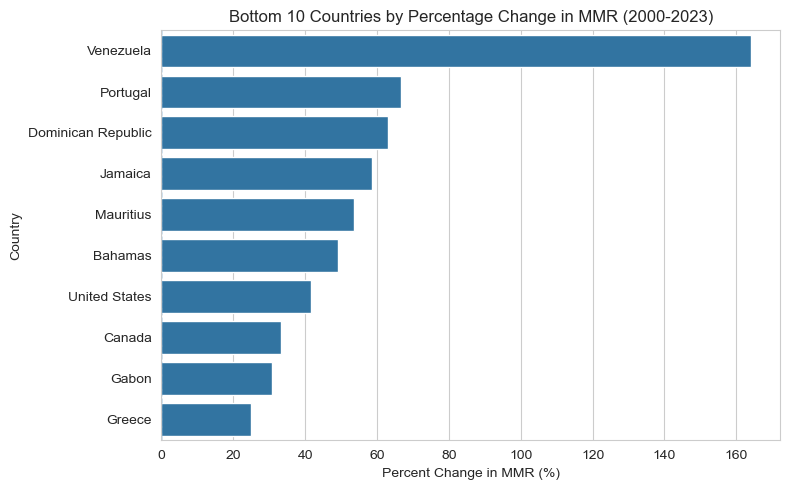

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=bottom10_percent.values,
    y=bottom10_percent.index,
    orient='h'
)

plt.axvline(0, linestyle='--', linewidth=1)
plt.title("Bottom 10 Countries by Percentage Change in MMR (2000-2023)")
plt.xlabel("Percent Change in MMR (%)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

**Relative increases (percentage change)** are dominated by countries that began with low maternal mortality but experienced notable reversals. `Venezuela` (+164%), Portugal (+67%), the `Dominican Republic` (+63%), `Jamaica` (+59%), and `North America’s` high-income countries (the `United States` and `Canada`) all saw substantial percentage increases. 

In these settings, relatively small absolute rises translate into large proportional changes, signalling policy and system failures where continued improvement was expected.

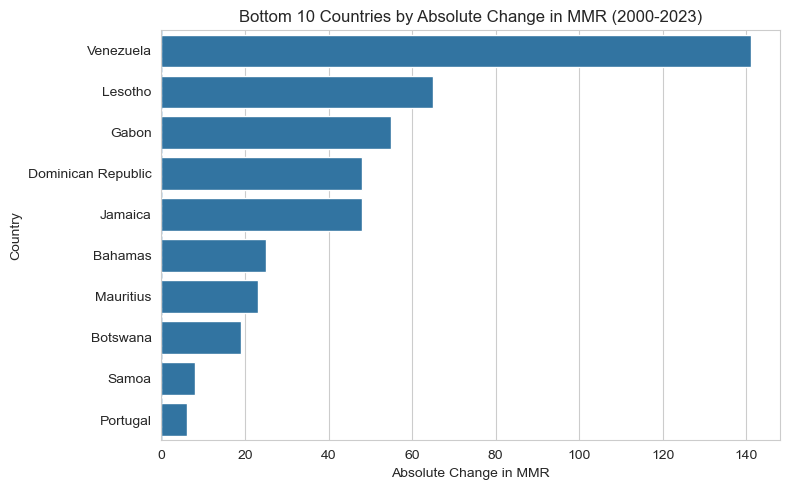

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=bottom10_absolute.values,
    y=bottom10_absolute.index,
    orient='h'
)

plt.axvline(0, linestyle='--', linewidth=1)
plt.title("Bottom 10 Countries by Absolute Change in MMR (2000-2023)")
plt.xlabel("Absolute Change in MMR")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

**Absolute increases**, however, highlight countries where maternal mortality rose by the largest number of deaths per 100,000 live births. `Venezuela` leads by a wide margin (+141), followed by `Lesotho`, `Gabon`, and several Caribbean and Southern African countries. These cases reflect acute deterioration in maternal health systems rather than long-standing high burden.

Importantly, persistently high-burden countries such as Nigeria do not appear in these lists because their maternal mortality remained high but did not increase sharply over the period. This distinction underscores the importance of separating chronic burden from regression: relative metrics capture proportional setbacks, while absolute metrics reveal where the greatest new losses have occurred.

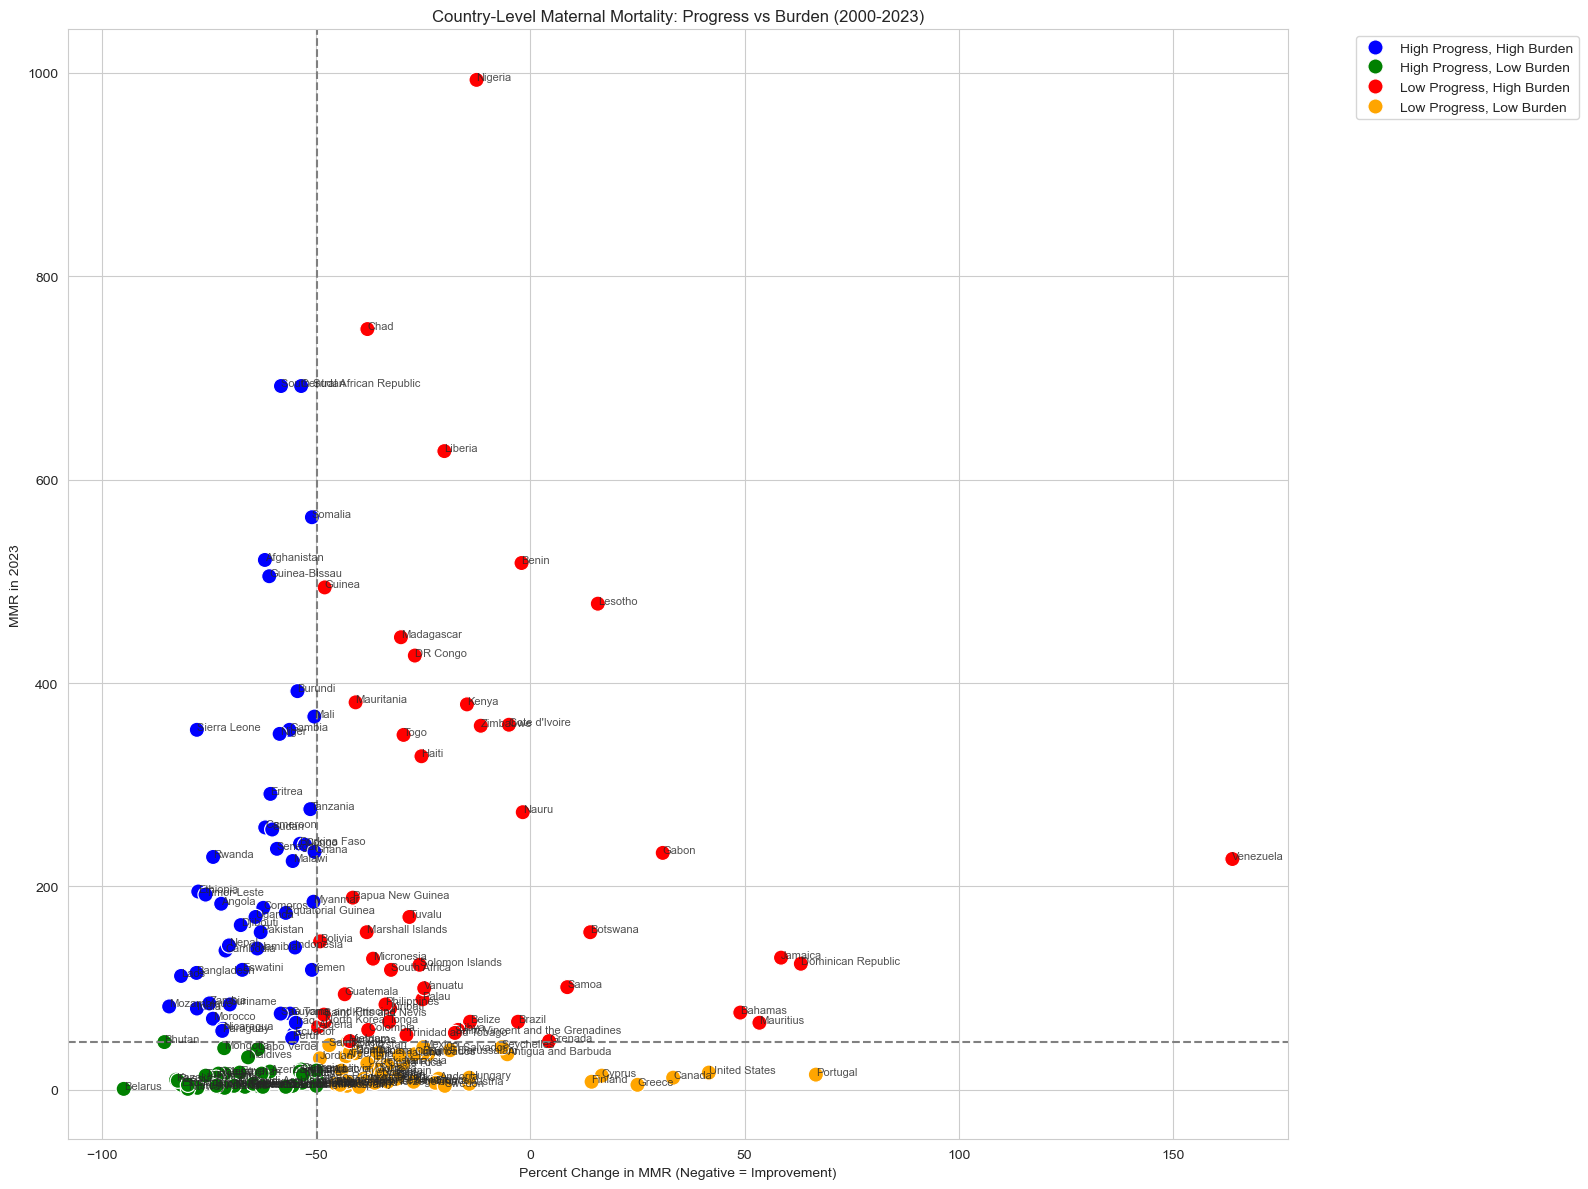

In [50]:
#Country-Level progress vs burden
country_summary = (
    df_long[df_long["Year"].isin([2000, 2023])]
    .pivot_table(
        index="Country",
        columns="Year",
        values="MMR",
        aggfunc="mean"
    )
    .reset_index()
)
country_summary.columns = ["Country", "MMR_2000", "MMR_2023"]
                           
country_summary["PercentChange"] = (
    (country_summary["MMR_2023"] - country_summary["MMR_2000"])
    / country_summary["MMR_2000"]
) * 100
#Define medians
median_change = country_summary["PercentChange"].median()
median_mmr = country_summary["MMR_2023"].median()
#Quadrants (negative = good)
def label_quadrant(row):
    if row["PercentChange"] <= median_change and row["MMR_2023"] <= median_mmr:
        return "High Progress, Low Burden"
    if row["PercentChange"] <= median_change and row["MMR_2023"] > median_mmr:
        return "High Progress, High Burden"
    if row["PercentChange"] > median_change and row["MMR_2023"] <= median_mmr:
        return "Low Progress, Low Burden"
    return "Low Progress, High Burden"

country_summary["Quadrant"] = country_summary.apply(label_quadrant, axis=1)

plt.figure(figsize=(16,12))

palette = {
    "High Progress, Low Burden": "green",   
    "High Progress, High Burden": "blue",  
    "Low Progress, Low Burden": "orange",    
    "Low Progress, High Burden": "red"    
}
sns.scatterplot(
    data=country_summary,
    x="PercentChange",   
    y="MMR_2023",
    hue="Quadrant",
    palette=palette,
    s=120,
    alpha=1
)
# Median lines
plt.axvline(median_change, color="gray", linestyle="--")
plt.axhline(median_mmr, color="gray", linestyle="--")

# Label ALL countries
for _, row in country_summary.iterrows():
    plt.text(
        row["PercentChange"],
        row["MMR_2023"],
        row["Country"],
        fontsize=8,
        alpha=0.8
    )

plt.title("Country-Level Maternal Mortality: Progress vs Burden (2000-2023)")
plt.xlabel("Percent Change in MMR (Negative = Improvement)")
plt.ylabel("MMR in 2023")

plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

#### **This scatter plot maps countries based on two dimensions:**

1. **Progress** - measured as the percent change in maternal mortality ratio (MMR) since 2000.

- Negative values indicate improvement (reduction in MMR).

- Positive values indicate stagnation or increase.

2. **Burden** - MMR level in 2023, reflecting the absolute maternal mortality risk in each country.

#### **Countries are grouped into four quadrants:**

1. **High Progress, Low Burden (Green) :**
Countries that achieved significant reductions in MMR and currently have low mortality rates.

Example: `Belarus.`

2. **High Progress, High Burden (Blue) :**
Countries that made significant improvements but still face high maternal mortality.

Example: `Mozambique`, `Afghanistan`.

3. **Low Progress, Low Burden (Orange) :**
Countries with low MMR that show little change over time. Low progress often reflects floor effects, where further reductions are harder to detect statistically.

Example: `Finland`, `Greece`.

4. **Low Progress, High Burden (Red)**
Countries that remain at high maternal mortality with minimal improvement since 2000. These are critical areas for intervention.

Example: `Nigeria`, `South Sudan`.

#### **Key insights:**

- High progress does not always correspond to low burden; some high-burden countries have made significant relative gains but still face substantial risk.

- Low-burden countries can show increases or stagnation due to measurement improvements, small population effects, or system sensitivities.

- The quadrants help distinguish efficiency in progress from absolute risk, providing a nuanced perspective for policy prioritisation.

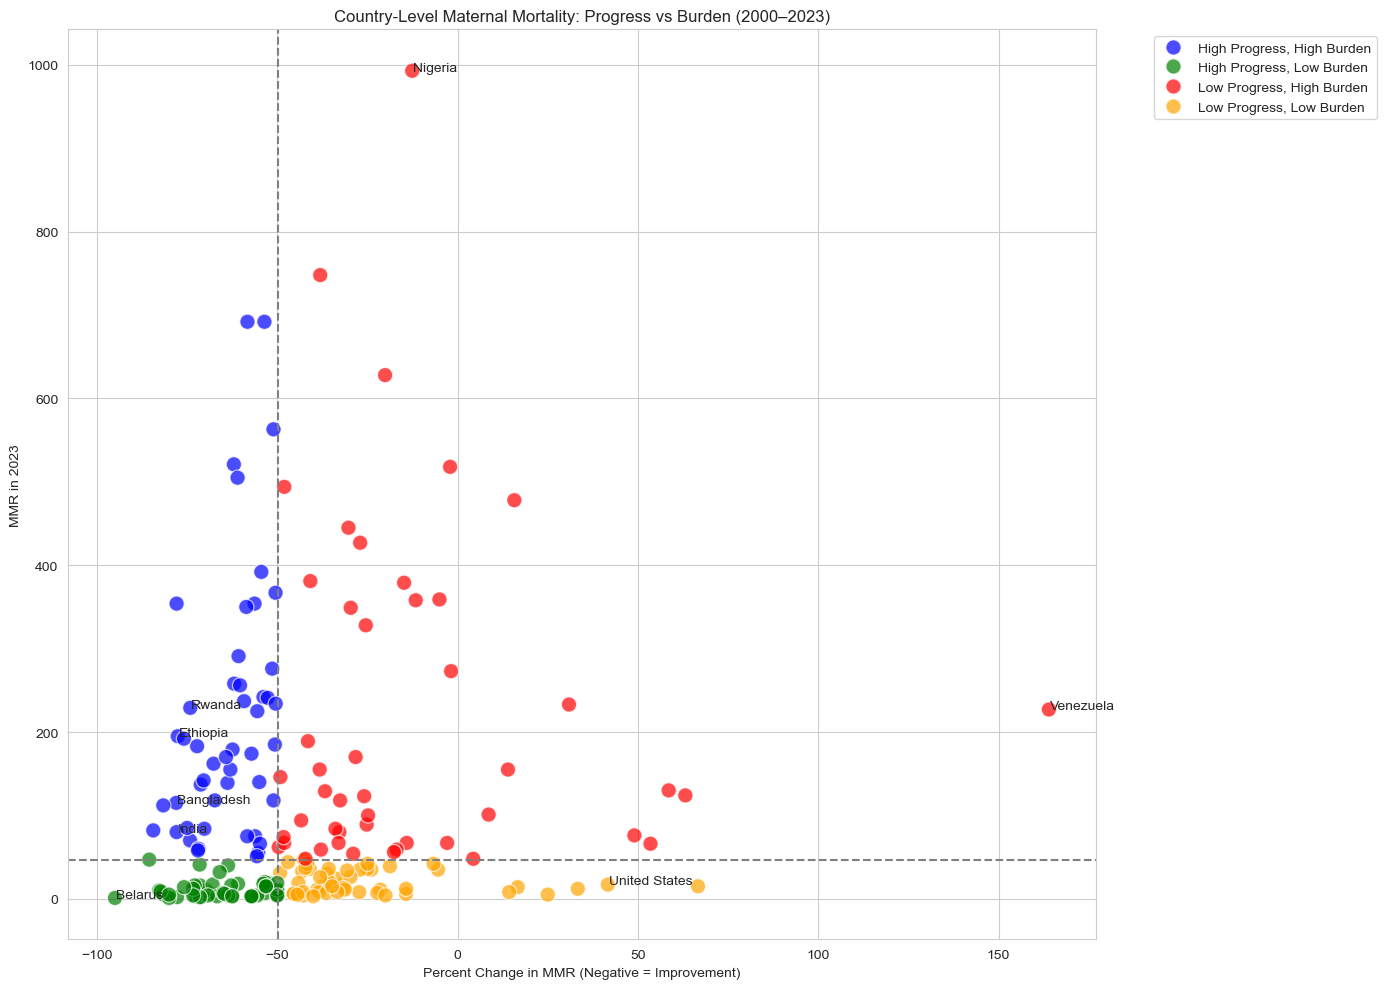

In [51]:
# Highlighting a few countries
highlight = ["Nigeria", "India", "United States", "Ethiopia", "Bangladesh", "Belarus", "Rwanda", "Venezuela"]

plt.figure(figsize=(14,10))

palette = {
    "High Progress, Low Burden": "green",
    "High Progress, High Burden": "blue",
    "Low Progress, Low Burden": "orange",
    "Low Progress, High Burden": "red"
}

sns.scatterplot(
    data=country_summary,
    x="PercentChange",
    y="MMR_2023",
    hue="Quadrant",
    palette=palette,
    s=120,
    alpha=0.7
)

# Median lines
plt.axvline(country_summary["PercentChange"].median(), color="gray", linestyle="--")
plt.axhline(country_summary["MMR_2023"].median(), color="gray", linestyle="--")

# Label only highlighted countries
for _, row in country_summary[country_summary["Country"].isin(highlight)].iterrows():
    plt.text(
        row["PercentChange"] + 0.3,  # slight offset for readability
        row["MMR_2023"] + 0.3,
        row["Country"],
        fontsize=10
    )

plt.title("Country-Level Maternal Mortality: Progress vs Burden (2000–2023)")
plt.xlabel("Percent Change in MMR (Negative = Improvement)")
plt.ylabel("MMR in 2023")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

In [52]:
#Checking average MMR per country per decade
#---1 Create a new column for decade
df_long['Decade'] = (df_long['Year'] // 10) * 10

# Average MMR 
decade_trends = df_long.groupby(['Country', 'Decade'])['MMR'].mean().reset_index()
decade_trends

,Country,Decade,MMR
0,Afghanistan,2000,1140.20
1,Afghanistan,2010,740.60
2,Afghanistan,2020,591.50
3,Albania,2000,12.10
4,Albania,2010,8.70
...,...,...,...
580,Zambia,2010,193.90
581,Zambia,2020,103.25
582,Zimbabwe,2000,471.50
583,Zimbabwe,2010,468.40


In [53]:
decade_wide = decade_trends.pivot(
    index="Country",
    columns="Decade",
    values="MMR"
)
print(decade_wide.head(10))
print()
print(decade_wide.tail(10))

Decade                 2000   2010    2020
Country                                   
Afghanistan          1140.2  740.6  591.50
Albania                12.1    8.7    9.00
Algeria                95.0   78.8   75.50
Andorra                12.6   10.6   23.50
Angola                494.7  254.4  193.50
Antigua and Barbuda    33.6   30.8   34.50
Argentina              59.6   43.3   47.00
Armenia                33.4   25.5   36.50
Australia               5.4    5.7    3.75
Austria                 6.1    6.4    6.25

Decade           2000   2010    2020
Country                             
United Kingdom   12.2    9.2   12.50
United States    13.2   16.8   22.50
Uruguay          21.0   16.2   26.00
Uzbekistan       38.7   31.4   27.50
Vanuatu         125.6  109.1  109.00
Venezuela        95.8  148.3  226.00
Vietnam          70.9   57.6   50.00
Yemen           190.4  136.6  133.50
Zambia          308.0  193.9  103.25
Zimbabwe        471.5  468.4  388.00


In [54]:
from IPython.display import display

In [55]:
display(decade_wide.head(10))
display(decade_wide.tail(10))

Decade,2000,2010,2020
Country,,,
Afghanistan,1140.2,740.6,591.50
Albania,12.1,8.7,9.00
Algeria,95.0,78.8,75.50
Andorra,12.6,10.6,23.50
Angola,494.7,254.4,193.50
Antigua and Barbuda,33.6,30.8,34.50
Argentina,59.6,43.3,47.00
Armenia,33.4,25.5,36.50
Australia,5.4,5.7,3.75


Decade,2000,2010,2020
Country,,,
United Kingdom,12.2,9.2,12.50
United States,13.2,16.8,22.50
Uruguay,21.0,16.2,26.00
Uzbekistan,38.7,31.4,27.50
Vanuatu,125.6,109.1,109.00
Venezuela,95.8,148.3,226.00
Vietnam,70.9,57.6,50.00
Yemen,190.4,136.6,133.50
Zambia,308.0,193.9,103.25


#### Decadal Snapshot of Maternal Mortality (2000-2020)

To complement the year-by-year trend analysis, I reshaped the data into a decadal view **(2000, 2010, and 2020)** to better observe longer-term shifts in maternal mortality across countries. 

This format highlights a vital nuance: countries with huge populations or already low maternal mortality often show relatively small incremental changes, even when those changes are meaningful in absolute numbers. 

For example, high-income countries such as the United States and the United Kingdom exhibit modest but steady increases over time, while some low-burden countries fluctuate around minimal values. In contrast, high-burden countries like Afghanistan, Angola, and Zimbabwe have seen significant absolute declines over decades, reflecting substantial progress despite remaining far from global targets. This decadal framing helps separate short-term volatility from structural change and underscores why progress should always be interpreted alongside baseline burden.

### Tracking progress of the countries with the highest maternal mortality in 2000 and assessing how far they have come by 2023.

In [56]:
#Comparing the top 10 countries in 2000 with their 2023 MMR value
pivot_country = country_trends.pivot(index="Country", columns="Year", values="MMR")

# Top 10 highest in 2000
top10_2000 = pivot_country[2000].nlargest(10)
top10_2000

# Extract 2023 values for those same countries
top10_2023 = pivot_country.loc[top10_2000.index, 2023]

# Combine into a comparison table
comparison = pd.DataFrame({
    "MMR_2000": top10_2000,
    "MMR_2023": top10_2023
})
comparison["AbsoluteChange"] = comparison["MMR_2023"] - comparison["MMR_2000"]
comparison["PercentChange"] = ((comparison["MMR_2023"] - comparison["MMR_2000"]) / comparison["MMR_2000"]) * 100

comparison

,MMR_2000,MMR_2023,AbsoluteChange,PercentChange
Country,,,,
South Sudan,1658.0,692.0,-966.0,-58.262967
Sierra Leone,1603.0,354.0,-1249.0,-77.916407
Central African Republic,1490.0,692.0,-798.0,-53.557047
Afghanistan,1372.0,521.0,-851.0,-62.026239
Guinea-Bissau,1295.0,505.0,-790.0,-61.003861
Chad,1208.0,748.0,-460.0,-38.079470
Somalia,1150.0,563.0,-587.0,-51.043478
Nigeria,1136.0,993.0,-143.0,-12.588028
Guinea,951.0,494.0,-457.0,-48.054679


In [57]:
comparison.sort_values("PercentChange")

,MMR_2000,MMR_2023,AbsoluteChange,PercentChange
Country,,,,
Sierra Leone,1603.0,354.0,-1249.0,-77.916407
Rwanda,885.0,229.0,-656.0,-74.124294
Afghanistan,1372.0,521.0,-851.0,-62.026239
Guinea-Bissau,1295.0,505.0,-790.0,-61.003861
South Sudan,1658.0,692.0,-966.0,-58.262967
Central African Republic,1490.0,692.0,-798.0,-53.557047
Somalia,1150.0,563.0,-587.0,-51.043478
Guinea,951.0,494.0,-457.0,-48.054679
Chad,1208.0,748.0,-460.0,-38.079470


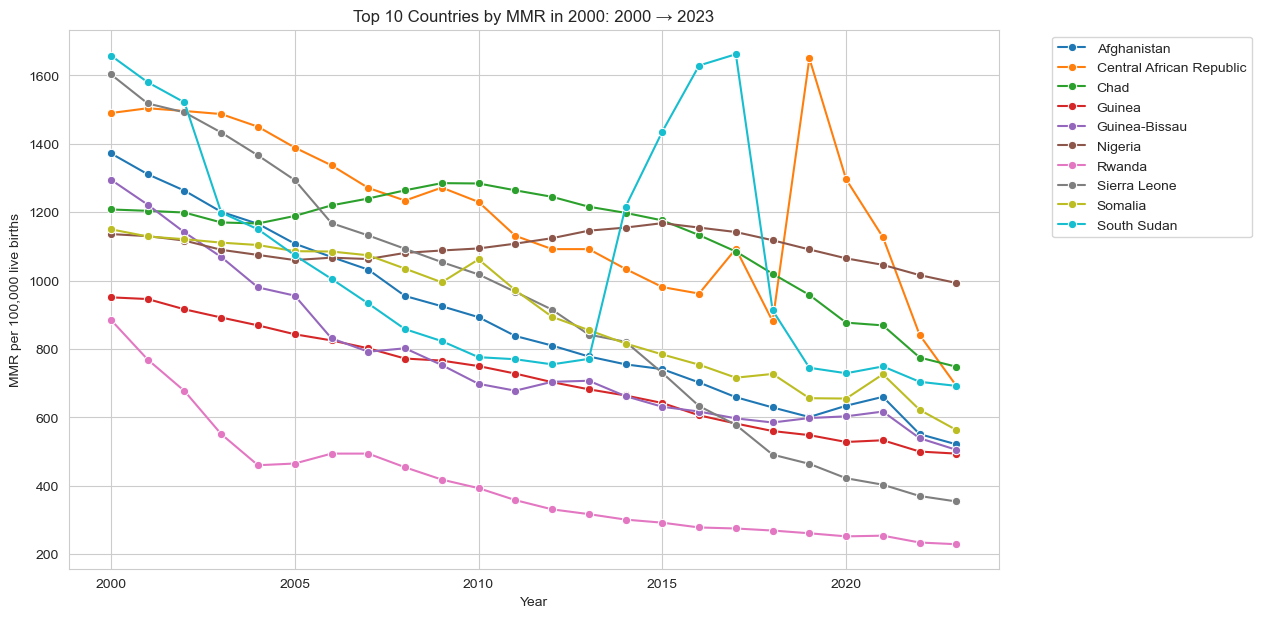

In [58]:
top10_countries = top10_2000.index
top10_trends = df_long[df_long['Country'].isin(top10_countries)]

plt.figure(figsize=(12,7))
sns.lineplot(
    data=top10_trends,
    x='Year',
    y='MMR',
    hue='Country',
    marker='o'
)
plt.title("Top 10 Countries by MMR in 2000: 2000 → 2023")
plt.ylabel("MMR per 100,000 live births")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

The countries with the highest maternal mortality ratios in `2000` have all recorded substantial absolute declines by `2023`, confirming that progress has occurred even in the most challenging settings. Several countries, such as `Sierra Leone`, `Rwanda`, and `Guinea`, more than halved their maternal mortality burden over the period, reflecting sustained investments in maternal health, conflict recovery, and health system strengthening.

However, despite these improvements, the burden remains critically high. Countries like `Nigeria`, `Chad`, `South Sudan`, and the `Central African Republic` still report MMRs well above `500` deaths per `100,000` live births, underscoring that early gains have not been sufficient to close the gap.

This highlights a key nuance: improvement does not equate to adequacy. While high-burden countries are moving in the right direction, the pace of decline is too slow to meet global targets without accelerated and targeted interventions.

In [59]:
# Find country with slowest improvement
slowest_country = comparison["PercentChange"].idxmax()
slowest_country

'Nigeria'

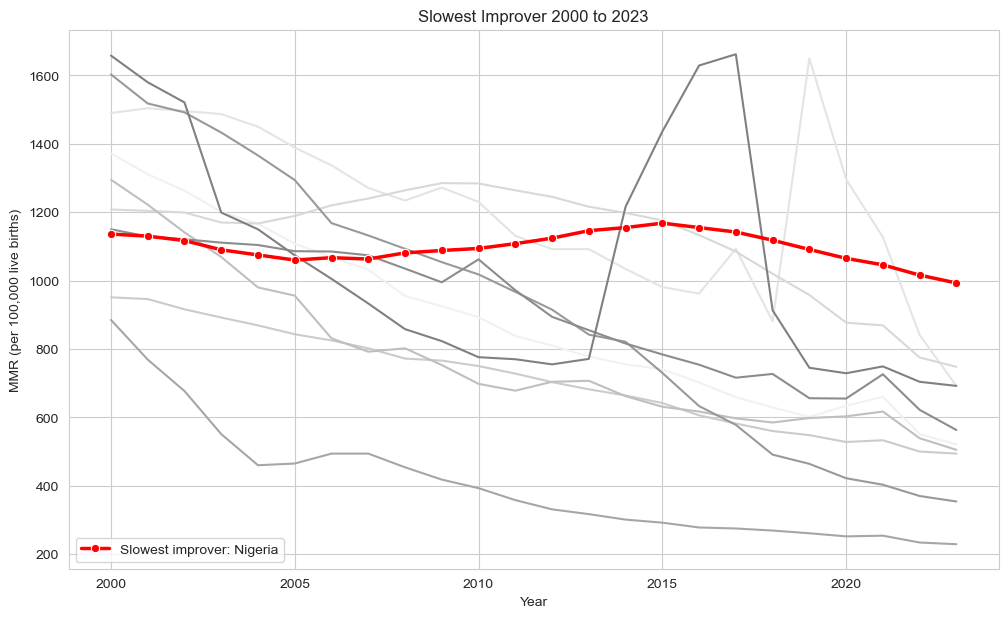

In [60]:
plt.figure(figsize=(12,7))

# Plot all top 10 countries in grey
sns.lineplot(
    data=top10_trends,
    x="Year",
    y="MMR",
    hue="Country",
    palette="light:grey",
    legend=False,
    linewidth=1.5
)

# Overlay the slowest improver in red
sns.lineplot(
    data=top10_trends[top10_trends["Country"] == slowest_country],
    x="Year",
    y="MMR",
    color="red",
    linewidth=2.5,
    marker="o",
    label=f"Slowest improver: {slowest_country}"
)

plt.title("Slowest Improver 2000 to 2023")
plt.ylabel("MMR (per 100,000 live births)")
plt.xlabel("Year")
plt.legend()
plt.show()

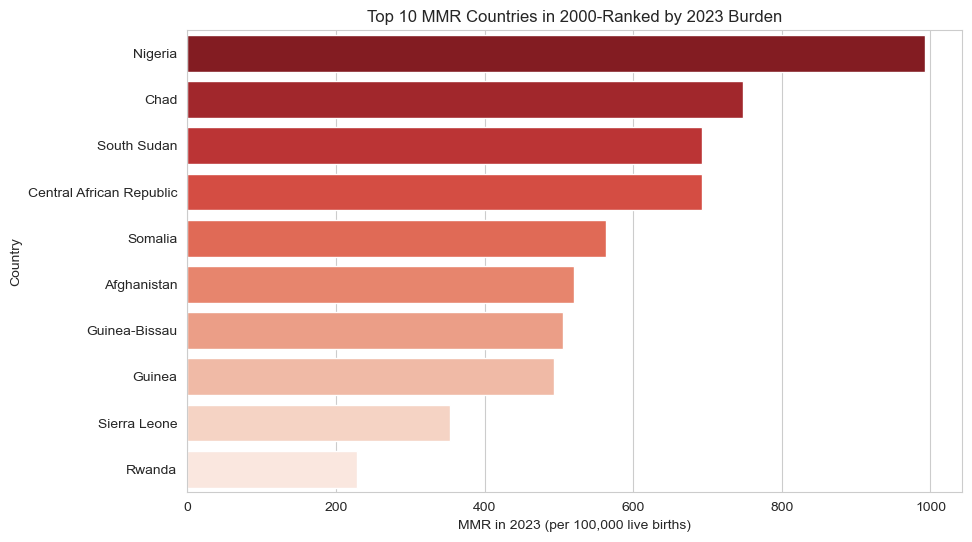

In [61]:
top10_summary = pd.DataFrame({
    "2000": pivot_country.loc[top10_countries, 2000],
    "2023": pivot_country.loc[top10_countries, 2023],
    "PercentChange": comparison.loc[top10_countries, "PercentChange"]
}).sort_values("2023", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top10_summary.reset_index(),
    x="2023",
    y="Country",
    hue="Country",  
    palette="Reds_r",
    dodge=False
)
plt.title("Top 10 MMR Countries in 2000-Ranked by 2023 Burden")
plt.xlabel("MMR in 2023 (per 100,000 live births)")
plt.ylabel("Country")
plt.show()

While the line chart illustrates the trajectory of maternal mortality ratios (MMR) from 2000 to 2023, the bar chart highlights the **current burden in 2023** for the countries that were worst off in 2000. This allows readers to see that even countries that have made significant improvements may still have high MMR, providing a complementary perspective to trend-focused visualisations.

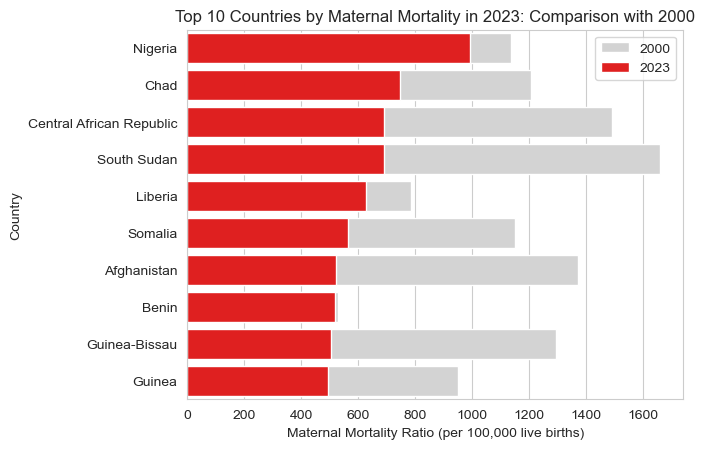

In [62]:
# Top 10 countries by MMR in 2023
top10_2023 = pivot_country[2023].nlargest(10)
top10_countries = top10_2023.index

top10_comparison = pd.DataFrame({
    "MMR_2000": pivot_country.loc[top10_countries, 2000],
    "MMR_2023": pivot_country.loc[top10_countries, 2023]
}).sort_values("MMR_2023", ascending=False)

top10_comparison

# Plot 2000 values in light grey
sns.barplot(
    data=top10_comparison.reset_index(),
    x="MMR_2000",
    y="Country",
    color="lightgrey",
    label="2000"
)

# Overlay 2023 values in red
sns.barplot(
    data=top10_comparison.reset_index(),
    x="MMR_2023",
    y="Country",
    color="red",
    label="2023"
)

plt.xlabel("Maternal Mortality Ratio (per 100,000 live births)")
plt.title("Top 10 Countries by Maternal Mortality in 2023: Comparison with 2000")
plt.legend()
plt.show()

**Shifts in Top-Burden Countries (2000–2023):** By combining 2000 MMR, 2023 MMR, absolute change, and percent change, we can see how the landscape of high-burden countries has evolved. Some countries, such as Benin, have moved into the top 10 highest MMRs by 2023 despite smaller absolute increases, highlighting that **relative improvements alone do not guarantee a low current burden**. This underscores the importance of tracking both **progress and remaining risk** when evaluating maternal mortality.

In [63]:
# Worst country per year
worst_countries = df_long.loc[df_long.groupby("Year")["MMR"].idxmax(), ["Year", "Country", "MMR"]]

# Best country per year
best_countries = df_long.loc[df_long.groupby("Year")["MMR"].idxmin(), ["Year", "Country", "MMR"]]

In [64]:
global_summary = df_long.groupby("Year")["MMR"].agg(
    avg="mean",
    worst="max",
    best="min"
).reset_index()

# Add country names for best and worst
global_summary = global_summary.merge(
    worst_countries.rename(columns={"MMR": "worst", "Country": "worst_country"}),
    on=["Year", "worst"],
    how="left"
)

global_summary = global_summary.merge(
    best_countries.rename(columns={"MMR": "best", "Country": "best_country"}),
    on=["Year", "best"],
    how="left"
)
global_summary

,Year,avg,worst,best,worst_country,best_country
0,2000,235.507692,1658,0,South Sudan,Cook Islands
1,2001,226.123077,1580,0,South Sudan,Cook Islands
2,2002,217.666667,1521,0,South Sudan,Cook Islands
3,2003,208.676923,1487,0,Central African Republic,Cook Islands
4,2004,201.984615,1450,0,Central African Republic,Cook Islands
5,2005,197.620513,1389,0,Central African Republic,Cook Islands
6,2006,194.287179,1337,0,Central African Republic,Cook Islands
7,2007,193.046154,1271,0,Central African Republic,Cook Islands
8,2008,192.805128,1264,0,Chad,Cook Islands
9,2009,191.230769,1387,0,Lesotho,Cook Islands


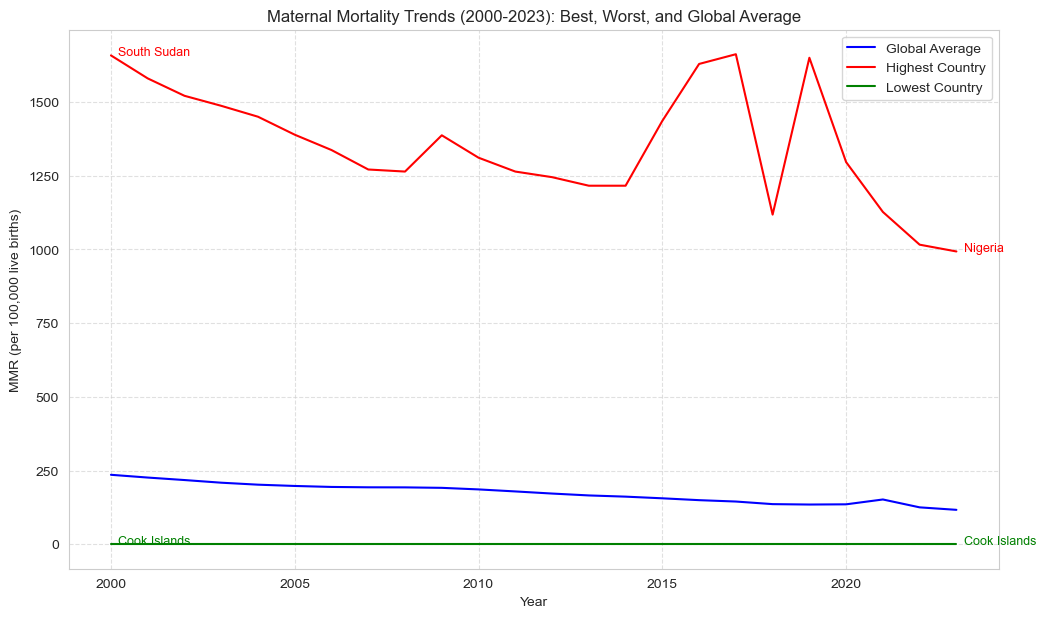

In [65]:
plt.figure(figsize=(12,7))

plt.plot(global_summary["Year"], global_summary["avg"], label="Global Average", color="blue")
plt.plot(global_summary["Year"], global_summary["worst"], label="Highest Country", color="red")
plt.plot(global_summary["Year"], global_summary["best"], label="Lowest Country", color="green")

# Annotate country names at start and end years
for year in [2000, 2023]:
    row = global_summary.loc[global_summary["Year"] == year]
    plt.text(year+0.2, float(row["worst"].iloc[0]), row["worst_country"].values[0], color="red", fontsize=9)
    plt.text(year+0.2, float(row["best"].iloc[0]), row["best_country"].values[0], color="green", fontsize=9)

plt.title("Maternal Mortality Trends (2000-2023): Best, Worst, and Global Average")
plt.xlabel("Year")
plt.ylabel("MMR (per 100,000 live births)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

**This table summarises global maternal mortality trends over the past two decades, highlighting the average maternal mortality ratio (MMR) and the highest and lowest country-level MMRs each year.**

- **Global Average (avg):** Shows the mean MMR across all countries, reflecting overall progress.

- **Worst-performing country (worst, worst_country):** Indicates the highest MMR observed each year, showing persistent hotspots of maternal risk.

- **Best-performing country (best, best_country):** Shows the lowest MMR each year, highlighting countries that have sustained minimal maternal mortality.

#### Key insights:

- The global average MMR has declined from ~236 per 100,000 live births in 2000 to ~117 in 2023.

- Sub-Saharan African countries dominate the worst-performing category, with South Sudan, the Central African Republic, Chad, and Nigeria repeatedly appearing at the top.

- The best-performing countries, such as Cook Islands, maintained MMR near zero throughout the period, demonstrating that sustained low maternal mortality is achievable.

The table also reflects temporary spikes or fluctuations in worst-case countries, influenced by conflict, health system disruptions, or measurement improvements.

This longitudinal view underscores the uneven pace of progress: while some countries maintain low maternal mortality rates, others remain trapped in high-risk contexts, highlighting the urgent need for targeted interventions.

In [66]:
from sklearn.linear_model import LinearRegression

#### **Forecasting Maternal Mortality to 2030**

Using linear projections based on 2000-2023 trends, each region’s maternal mortality ratio (MMR) is estimated for 2030 to assess whether regions are on track to meet the SDG target of 70 deaths per 100,000 live births.

In [67]:
#Forecast for regional averages
regional_trends = df_long.groupby(["URR", "Year"])["MMR"].mean().reset_index()

# Container for forecasts
forecast_results = []

for region in regional_trends["URR"].unique():
    subset = regional_trends[regional_trends["URR"] == region]
    
    # Prepare X (year) and y (MMR)
    X = subset["Year"].values.reshape(-1, 1)
    y = subset["MMR"].values
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict for 2030
    mmr_2030 = model.predict([[2030]])[0]
    
    # Store
    forecast_results.append({
        "Region": region,
        "MMR_2023": y[-1],
        "Forecast_2030": mmr_2030,
        "On_Target": mmr_2030 < 70
    })

# Convert to DataFrame
forecast_df = pd.DataFrame(forecast_results)
forecast_df

,Region,MMR_2023,Forecast_2030,On_Target
0,East Asia and Pacific,85.354839,56.010902,True
1,Europe and Central Asia,9.057692,8.231987,True
2,Latin America and Caribbean,71.666667,70.016201,False
3,Middle East and North Africa,30.526316,22.650931,True
4,North America,14.500000,19.870290,True
5,Not Classified,11.000000,25.051304,True
6,South Asia,138.750000,26.423714,True
7,Sub-Saharan Africa,316.959184,247.336903,False


- Some high-burden regions, like Sub-Saharan Africa, remain far off track.

- Even regions with moderate 2023 MMRs, like Latin America and the Caribbean, may just miss the SDG target without accelerated interventions.

- Forecasts are not predictions; they highlight policy urgency and the trajectory of progress if current trends continue.

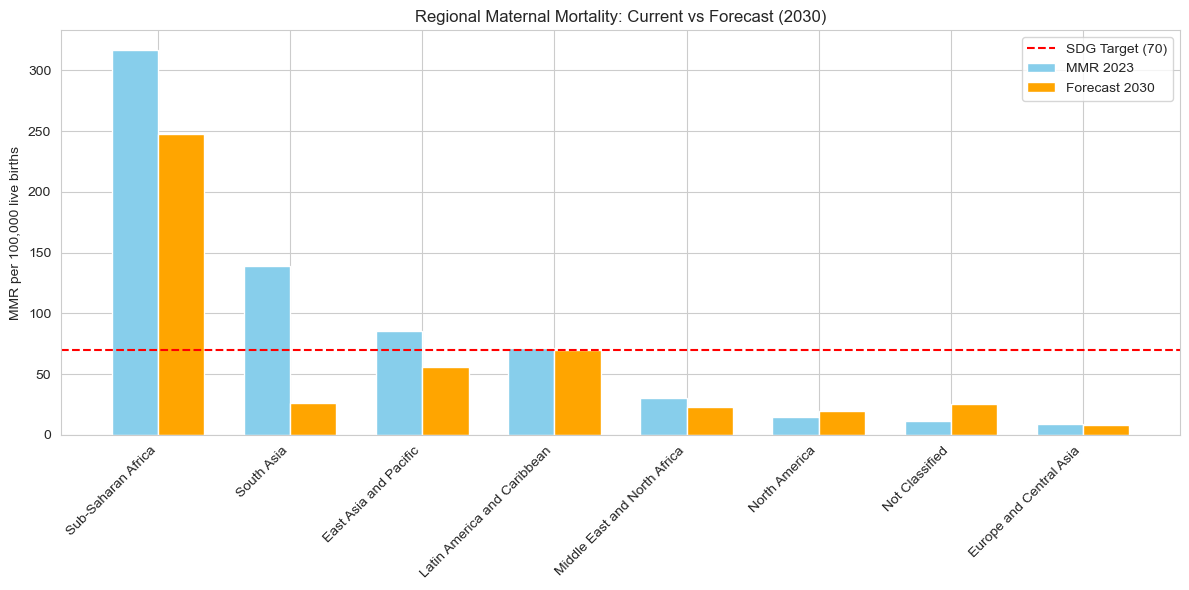

In [68]:
forecast_df_sorted = forecast_df.sort_values('MMR_2023', ascending=False)

plt.figure(figsize=(12,6))

bar_width = 0.35
x = range(len(forecast_df_sorted))

# Bars for 2023
plt.bar(
    [i - bar_width/2 for i in x],
    forecast_df_sorted['MMR_2023'],
    width=bar_width,
    color='skyblue',
    label='MMR 2023'
)

# Bars for 2030 forecast
plt.bar(
    [i + bar_width/2 for i in x],
    forecast_df_sorted['Forecast_2030'],
    width=bar_width,
    color='orange',
    label='Forecast 2030'
)

# SDG target line
plt.axhline(70, color='red', linestyle='--', label='SDG Target (70)')

# Labels
plt.xticks(x, forecast_df_sorted['Region'], rotation=45, ha='right')
plt.ylabel('MMR per 100,000 live births')
plt.title('Regional Maternal Mortality: Current vs Forecast (2030)')
plt.legend()
plt.tight_layout()
plt.show()

* This bar chart presents the 2030 MMR forecasts by region, clearly showing which regions are projected to meet the SDG target and which are at risk.

* Bars extending beyond 70 MMR (red dashed line) indicate regions not on track.

* The chart highlights both absolute burden (height of the bar) and the urgency for intervention in lagging regions.

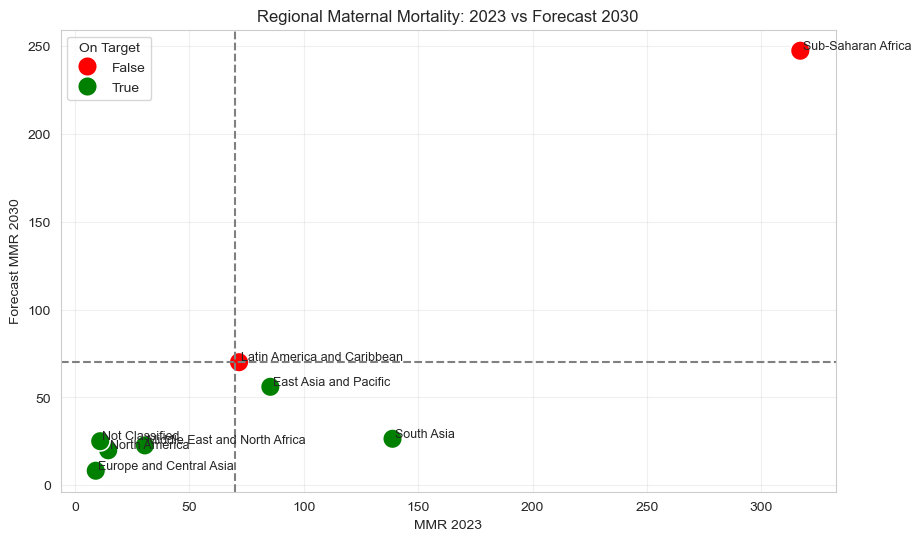

In [69]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=forecast_df,
    x='MMR_2023',
    y='Forecast_2030',
    hue='On_Target',
    palette={True: 'green', False: 'red'},
    s=200
)

# SDG lines
plt.axhline(70, color='gray', linestyle='--')
plt.axvline(70, color='gray', linestyle='--')

# Annotate regions
for _, row in forecast_df.iterrows():
    plt.text(row['MMR_2023']+1, row['Forecast_2030']+1, row['Region'], fontsize=9)

plt.xlabel('MMR 2023')
plt.ylabel('Forecast MMR 2030')
plt.title('Regional Maternal Mortality: 2023 vs Forecast 2030')
plt.legend(title='On Target')
plt.grid(alpha=0.3)
plt.show()

#### This scatter plot maps MMR in 2023 vs. forecasted 2030 MMR for each region:

- **Green dots (True):** projected to meet SDG target.

- **Red dots (False):** projected to miss the target.

The plot quickly visualises which regions are on track and emphasises the gap between progress and the `SDG goal`, highlighting where policy attention is most critical.

#### Using the same linear projections from 2000-2023 trends, each **country’s maternal mortality ratio (MMR)** was forecasted for 2030 to assess whether they are on track to meet the SDG target of 70 deaths per 100,000 live births.

In [70]:
country_forecasts = []

for country, group in df_long.groupby("Country"):
    
    # Sort by year 
    group = group.sort_values("Year")
    
    # Year and MMR values
    X = group["Year"].values.reshape(-1, 1)
    y = group["MMR"].values
    
    # Fit model
    model = LinearRegression()
    model.fit(X, y)
    
    # Use 2023 numbers
    mmr_2023 = group.loc[group["Year"] == 2023, "MMR"]
    mmr_2023 = mmr_2023.values[0]
    
    # Predict 2030
    forecast_2030 = model.predict([[2030]])[0]
    
    # SDG target check
    on_target = forecast_2030 < 70
    
    country_forecasts.append({
        "Country": country,
        "MMR_2023": mmr_2023,
        "Forecast_2030": forecast_2030,
        "On_Target": on_target
    })

country_forecasts = pd.DataFrame(country_forecasts)

# View highest projected burden
country_forecasts.sort_values("Forecast_2030", ascending=False).head(20)

,Country,MMR_2023,Forecast_2030,On_Target
124,Nigeria,993,1067.287391,False
33,Chad,748,803.863478,False
32,Central African Republic,692,767.130580,False
96,Liberia,628,669.252899,False
163,South Sudan,692,638.163188,False
18,Benin,518,610.135362,False
95,Lesotho,478,598.718261,False
41,Cote d'Ivoire,359,460.370435,False
46,DR Congo,427,429.920870,False
88,Kenya,379,414.476522,False


In [71]:
country_forecasts["Forecast_2030"] = country_forecasts["Forecast_2030"].clip(lower=0)

In [72]:
country_forecasts[country_forecasts["Forecast_2030"] <= 70].sort_values("Forecast_2030")

,Country,MMR_2023,Forecast_2030,On_Target
92,Laos,112,0.000000,True
137,Poland,2,0.000000,True
143,Russia,9,0.000000,True
144,Rwanda,229,0.000000,True
134,Paraguay,58,0.000000,True
...,...,...,...,...
154,Seychelles,42,61.310290,True
43,Cuba,35,61.614058,True
57,Eswatini,118,62.190435,True
147,Saint Vincent and the Grenadines,56,64.834638,True


In [73]:
country_forecasts[country_forecasts["Forecast_2030"] <= 70].sort_values("MMR_2023").head(20)

,Country,MMR_2023,Forecast_2030,On_Target
39,Cook Islands,0,0.000000,True
127,Norway,1,0.000000,True
15,Belarus,1,0.000000,True
137,Poland,2,0.000000,True
82,Israel,2,0.457971,True
8,Australia,2,3.963043,True
85,Japan,3,2.279565,True
45,Czechia,3,1.300290,True
126,North Macedonia,3,2.061594,True
42,Croatia,3,3.690870,True


In [74]:
country_forecasts[country_forecasts["Forecast_2030"] <= 70].sort_values("Forecast_2030").head(20)

,Country,MMR_2023,Forecast_2030,On_Target
92,Laos,112,0.0,True
137,Poland,2,0.0,True
143,Russia,9,0.0,True
144,Rwanda,229,0.0,True
134,Paraguay,58,0.0,True
131,Palestine,16,0.0,True
155,Sierra Leone,354,0.0,True
19,Bhutan,47,0.0,True
87,Kazakhstan,10,0.0,True
15,Belarus,1,0.0,True


In [75]:
country_forecasts[country_forecasts["Forecast_2030"] <= 70].sort_values("Forecast_2030", ascending=False).head(20)

,Country,MMR_2023,Forecast_2030,On_Target
37,Comoros,179,67.918986,True
147,Saint Vincent and the Grenadines,56,64.834638,True
57,Eswatini,118,62.190435,True
43,Cuba,35,61.614058,True
154,Seychelles,42,61.310290,True
176,Tonga,67,60.106522,True
145,Saint Kitts and Nevis,74,59.682029,True
2,Algeria,62,56.670870,True
135,Peru,51,55.816087,True
129,Pakistan,155,54.885652,True


#### **Key observations from the forecast tables:**

**Countries off track:**

- Countries with the highest MMR in 2023, such as Nigeria, Chad, and Central African Republic, are projected to remain far above the target by 2030.

- These countries represent both high absolute burden and slow relative progress, highlighting the urgent need for targeted interventions.

**Countries on track:**

- Many countries, including Poland, Russia, Rwanda, Laos, and Bhutan, are projected to achieve the SDG target.

- Some countries with moderate 2023 MMRs show zero forecasted MMR in projections (an artefact of linear regression and capped forecasts), indicating that if current trends continue, they will comfortably meet the target.

**Trajectories vary widely:**

- Even countries with similar 2023 MMRs can diverge in 2030 forecasts depending on their historical trends.

- Small countries or those with low absolute burden may appear on track due to faster relative improvements.

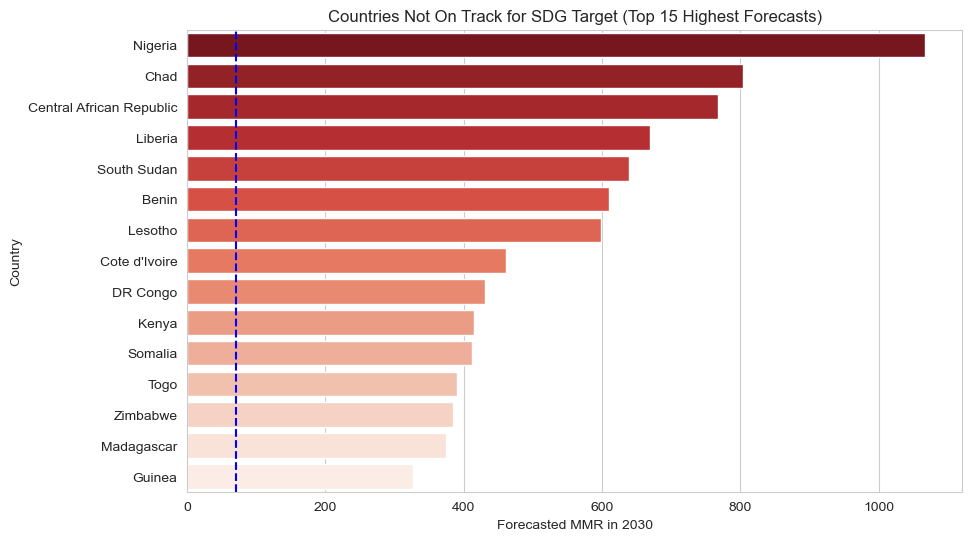

In [76]:
# Filter countries not on track
not_on_track = country_forecasts[country_forecasts["On_Target"] == False]\
    .sort_values("Forecast_2030", ascending=False).head(15)  # top 15 worst-off

plt.figure(figsize=(10,6))
sns.barplot(
    data=not_on_track,
    x="Forecast_2030",
    y="Country",
    hue="Country",       
    palette="Reds_r",
    dodge=False,
    legend=False
)
plt.axvline(70, color="blue", linestyle="--", label="SDG Target (70 MMR)")
plt.xlabel("Forecasted MMR in 2030")
plt.ylabel("Country")
plt.title("Countries Not On Track for SDG Target (Top 15 Highest Forecasts)")
plt.show()

This bar chart highlights the 15 countries with the highest forecasted maternal mortality ratios (MMR) in 2030.

- **X-axis:** Forecasted MMR in 2030 (per 100,000 live births)
  
- **Y-axis:** Country names

- **Bars:** Represent absolute burden; darker reds indicate higher values

- **Vertical dashed line at 70 MMR:** The SDG target threshold

#### Key Insights:

1. All countries here are above the blue line, and are projected to miss the SDG target if current trends continue.

2. The visualisation emphasises the urgent policy and programmatic focus on the worst-off countries.

3. Using absolute MMR highlights where preventable risk remains high, complementing relative progress measures.

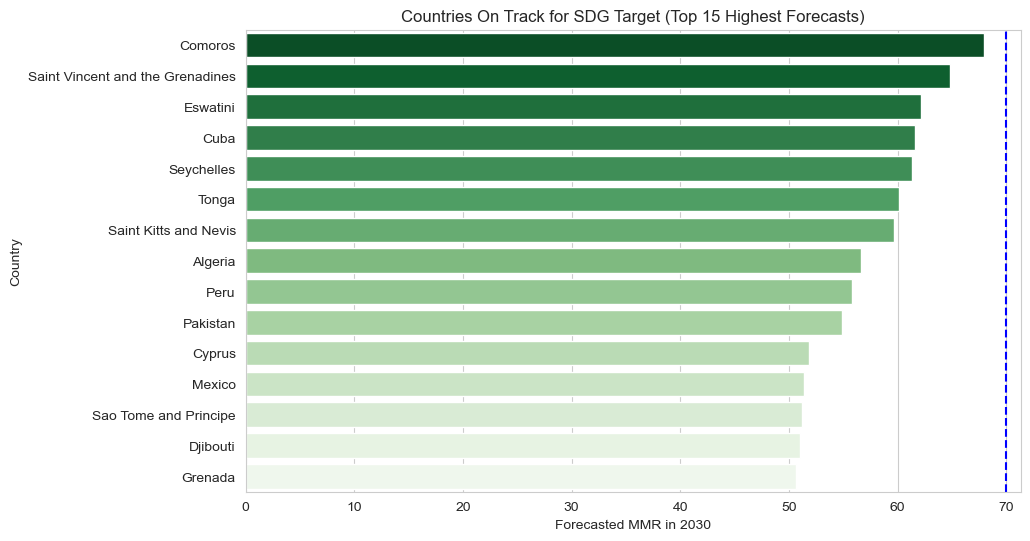

In [77]:
# Filter countries on track
on_track = country_forecasts[country_forecasts["On_Target"] == True]\
    .sort_values("Forecast_2030", ascending=False).head(15)  # top 15 highest forecasted MMR among on-track countries

plt.figure(figsize=(10,6))
sns.barplot(
    data=on_track,
    x="Forecast_2030",
    y="Country",
    hue="Country",       
    palette="Greens_r",  
    dodge=False,
    legend=False
)
plt.axvline(70, color="blue", linestyle="--", label="SDG Target (70 MMR)")
plt.xlabel("Forecasted MMR in 2030")
plt.ylabel("Country")
plt.title("Countries On Track for SDG Target (Top 15 Highest Forecasts)")
plt.show()

This bar chart highlights the on-track countries that are approaching, but have not yet reached, the SDG maternal mortality target of `70 deaths per 100,000 live births by 2030`. Unlike countries with very low forecasted MMR (close to zero), these countries are `“just under the line,”` showing significant progress while still requiring attention to sustain and finalise gains. The blue-dashed line indicates the SDG threshold for context.

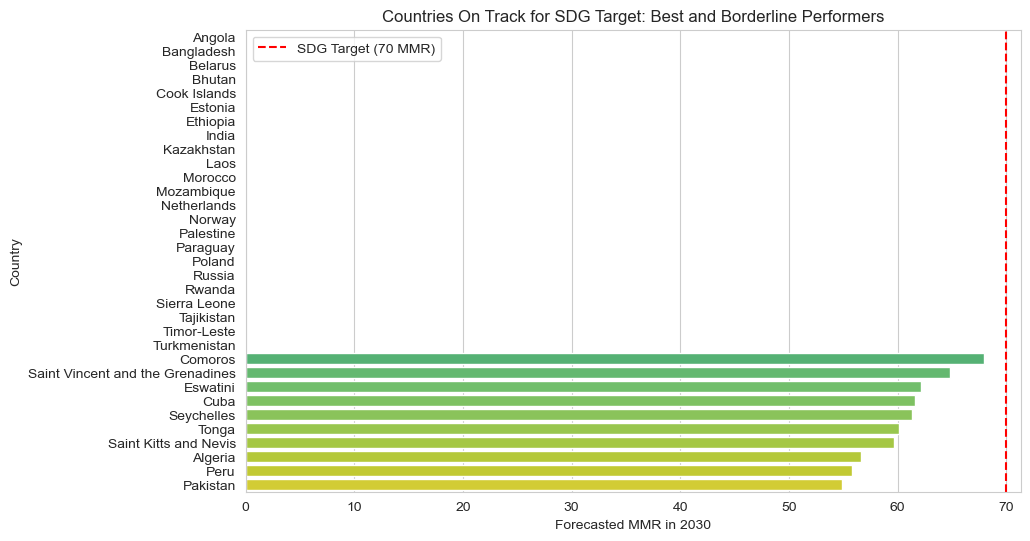

In [78]:
# Best performers (flat zero)
top_zero = country_forecasts[
    country_forecasts["Forecast_2030"] == 0
]

# Borderline countries just below the SDG target
borderline = country_forecasts[
    (country_forecasts["Forecast_2030"] > 0) &
    (country_forecasts["Forecast_2030"] < 70)
].sort_values("Forecast_2030", ascending=False).head(10)

# Combine
focus_on_track = pd.concat([top_zero, borderline])

plt.figure(figsize=(10,6))
sns.barplot(
    data=focus_on_track,
    x="Forecast_2030",
    y="Country",
    hue="Country",
    palette="viridis",
    dodge=False,
    legend=False
)

plt.axvline(70, color="red", linestyle="--", label="SDG Target (70 MMR)")
plt.xlabel("Forecasted MMR in 2030")
plt.ylabel("Country")
plt.title("Countries On Track for SDG Target: Best and Borderline Performers")
plt.legend()
plt.show()

### Countries On Track for the SDG Target: Best and Borderline Performers

This visualisation focuses on countries forecast to remain **below the SDG maternal mortality target of 70 deaths per 100,000 live births by 2030**, but for very different reasons.

#### Two groups are highlighted:
- **Best performers**, whose forecasts approach zero maternal deaths, reflecting sustained low burden and strong health system performance.
- **Borderline countries**, which remain on track but sit just below the SDG threshold, making them vulnerable to setbacks from policy shocks, health system strain, or external crises.

Plotting these countries together helps distinguish between **structural success** and **fragile progress**. While all countries shown meet the numerical target, those closer to the threshold require continued investment to avoid reversal. In contrast, zero-forecast countries illustrate what long-term system stability can achieve.


In [79]:
zero_countries = country_forecasts[country_forecasts["Forecast_2030"] == 0]["Country"]
zero_countries.tolist()

['Angola',
 'Bangladesh',
 'Belarus',
 'Bhutan',
 'Cook Islands',
 'Estonia',
 'Ethiopia',
 'India',
 'Kazakhstan',
 'Laos',
 'Morocco',
 'Mozambique',
 'Netherlands',
 'Norway',
 'Palestine',
 'Paraguay',
 'Poland',
 'Russia',
 'Rwanda',
 'Sierra Leone',
 'Tajikistan',
 'Timor-Leste',
 'Turkmenistan']

### Countries Forecasted to Reach Zero Maternal Mortality by 2030

The above countries are forecasted to reach **zero maternal mortality (MMR = 0)** by 2030 based on current trends:

This group spans **multiple regions and income levels**, indicating that achieving extremely low maternal mortality is not limited to high-income countries. However, a forecast of zero should be interpreted as **effective elimination rather than absolute absence of maternal deaths**, reflecting sustained improvements in maternal healthcare access, skilled birth attendance, and emergency obstetric care.

The presence of several Sub-Saharan African and South Asian countries in this list highlights the potential impact of **recent accelerated progress**, while also underscoring the importance of maintaining gains to prevent future reversals.


### Forecasting Methodology and Interpretation

The 2030 forecasts presented in this analysis are based on a **linear projection of historical maternal mortality trends**. This approach extends past patterns forward under the assumption that the **rate and direction of change observed historically remain constant** through 2030.

Importantly, this method **does not account for future policy interventions, healthcare system improvements, economic changes, conflict resolution, or global health initiatives** that could significantly alter outcomes. As a result, some countries are projected to experience **rising maternal mortality**, not because deterioration is inevitable, but because historical trends show stagnation or worsening conditions during the observed period.

These forecasts should therefore be interpreted as a **baseline or “status quo” scenario**, highlighting where countries may end up **if no substantial changes occur**. In this sense, the projections are most helpful for identifying **risk areas and the urgency of intervention**, rather than predicting fixed outcomes.


### Limitations

This analysis has several important limitations that should be considered when interpreting the results.

`First`, the forecasts rely on **linear trend extrapolation**, which assumes that historical patterns continue unchanged into the future. This approach does not capture potential **non-linear improvements or setbacks**, such as rapid policy reforms, health system investments, pandemics, economic shocks, or conflict.

`Second`, data quality and availability vary across countries and regions. In some low-resource or conflict-affected settings, maternal mortality estimates are subject to **greater uncertainty**, which may affect both trend estimation and forecasts.

`Third`, the analysis treats countries as independent units and does not explicitly incorporate **contextual drivers** such as healthcare access, fertility rates, education, inequality, or governance quality. As a result, the forecasts reflect *outcomes*, not the underlying mechanisms driving change.

`Finally`, projected improvements or deteriorations should not be interpreted as inevitable. Rather, they highlight where **current trajectories are insufficient** and where targeted interventions could have the greatest impact.

## Conclusion

This notebook assessed maternal mortality trends at global, regional, and country levels, evaluated progress toward the Sustainable Development Goal target, and projected outcomes to 2030 under continued historical trends.

The results indicate that while many countries are on track to meet or remain below the SDG threshold, **progress is highly uneven**. A significant share of the global maternal mortality burden remains concentrated in a small number of countries, particularly within Sub-Saharan Africa, where current rates and projected trends suggest that the 2030 target is unlikely to be achieved without substantial change.

The forecasts presented here should be interpreted as a **status quo scenario**. They underscore the scale of effort required to accelerate progress and highlight countries where maternal mortality reduction must be prioritised through **health system strengthening, equitable access to quality maternal care, skilled birth attendance, and broader social and economic investments**.

Ultimately, these findings emphasise that maternal mortality is not only a health indicator but a reflection of **broader inequalities in access, resources, and resilience **. Achieving the global maternal mortality target will depend not on the continuation of past trends, but on **decisive, sustained, and context-specific action**. The findings in this analysis aim to support evidence-based prioritisation and inform discussions on where such action is most urgently needed.
